# Mini-Projet : Modélisation et Machine Learning

## Arbre de décision - Jeu Akinator

![](Akinator'spicture.jpg)

Le jeu Akinator est un jeu basé sur les arbres de décisions, qui avec quelques questions, peut trouver à quoi vous penser. Ici, on propose de reproduire ce jeu pour un dataset plus limité pour des raisons de simplicité et de temps. Créé par deux français, Jeff et Arnaud, edité par Elokence, le jeu connaît littéralement un pic de popularité dans les années 2009 - 2010.[[1](#Bibliographie)]

On utilisera dans notre cas un jeu de donnée qui recense un certain nombre d'animaux ainsi que leurs caractéristiques physiques permettant des les différenciers les uns des autres. Pour commencer, nous verrons 3 différentes méthodes et nous prendrons comme choix d'animal à deviner le tigre. Ce choix est bien sûr totalement arbitraire et vous pourrez bien sur changer cet animal et choisir l'un de notre base de donnée.

## Sommaire

 1. [Dataset : Présentation et limites](#Le-dataset-:-Présentation-et-limites)
 2. [Déroulement du projet](#Déroulement-du-projet)
 3. [Approche déterministe](#Approche-déterministe)
     1. [Questions aléatoires](#Questions-aléatoires)
     2. [Questions dirigées](#Questions-dirigées)
     3. [Questions semi-dirigées](#Questions-semi-dirigées)
 4. [Automatisation des algorithmes](#Automatisation-des-algorithmes)
     1. [Présentation de l'automatisation](#Présentation-de-l'automatisation)
         1. [Questions aléatoires automatiques](#Questions-aléatoires-automatiques)
         2. [Questions dirigées automatiques](#Questions-dirigées-automatiques)
         3. [Questions semi-dirigées automatiques](#Questions-semi-dirigées-automatiques)
     2. [Définition d'une classe](#Définition-d'une-classe)
 5. [Analyse](#Analyse)
     1. [Convergence des algorithmes](#Convergence-des-algorithmes)
     2. [Influence du nombre de données](#Influence-du-nombre-de-données)
     3. [Le paramètre $\Xi$](#Le-paramètre-\Xi)
 6. [Autres méthodes](#Autres-méthodes)
     1. [Arbre de décision](#Arbre-de-décision)
     2. [Random Forest](#Random-Forest)
 7. [Approche Probabiliste : Inférence Bayésienne](#Approche-Probabiliste-:-Inférence-Bayésienne)
 8. [Méthodes de visualisation / Classifications](#Méthodes-de-visualisation-/-Classifications)
     1. [PCA](#PCA)
     2. [Kmeans](#Kmeans)
 9. [Ouverture](#Ouverture)
 10. [Retour sur le mini projet](#Retour-sur-le-mini-projet)
     1. [Inconvénients](#Inconvénients)
     2. [Avantages : Résumé des choses apprises](#Avantages-:-Résumé-des-choses-apprises)
 11. [Bibliographie](#Bibliographie)

# Le dataset : Présentation et limites

Le jeu Akinator possède une base de donnée immensément grande, de plus, chacun peut la compléter librement. Dans notre cas, nous avons utilisé une base de donnée déjà existante, complétée par nos soins. Le dataset que nous avons séléctionné provient du site kaggle : [[5](#Bibliographie)], et contient des données d'animaux venant d'un zoo. Il contenait au départ une liste de 101 animaux, tous étant présents en général dans les zoos. On voit ici un premier problème, nous avions des animaux sauvages mais pas d'animaux famillier tels que le chien, le chat, la vache, etc... Il y a donc eu un premier travail manuel afin de compléter notre base de donnée afin qu'elle possède un maximum d'animaux, ou plutôt qu'elle possède les animaux les plus communément choisis. En effet, dans notre base de donnée initiale, certains animaux étaient complètement inconnus du grand public (par exemple "aardvark" ou "l'oryctérope du cap" en français..), nous avons donc choisi de supprimer ces animaux de la liste car on considère qu'ils ont très peu de chance d'être choisis au départ. Au final, nous nous retrouvons finalement avec une liste de 162 animaux parmis les plus connus.

Par ailleurs, notre liste de départ contenait une quinzaine de caractéristiques physiques différentes, ce qui n'est évidement pas assez pour tous les distinguer de manière unique. En effet, pour un humain il est facile de distinguer par exemple un cheval et une vache. Cependant, pour l'ordinateur, ces animaux ne sont que des chiffres, il faut donc trouver assez de caractéristiques physiques afin que celui-ci puisse distinguer tous les animaux entre eux. Il y a donc eu encore un travail de réflexion sur les questions pertinentes à poser afin de distinguer le plus efficacement les animaux. Malgré tous nos efforts, il reste encore un groupe composé de 3 animaux, et un autre de 2 que l'on ne peut malheuresement pas séparer à moins de poser des questions très pointilleuses, ce que nous n'avons pas choisi de faire.

# Déroulement du projet

Après ce travail en amont sur le dataset, il a fallu penser l'algorithme d'akinator. Plusieurs algorithmes vous seront présentés dans ce compte-rendu. En effet une première approche a été l'approche déterministe. En effet tout le cerveau d'akinator tient dans le fait d'aller chercher les bonnes informations dans la base de données, ceci de façon la plus efficace possible et donc en limitant les questions. Nous proposerons donc dans cette approche plusieurs algorithmes, commençant de la manière la plus simple de poser les questions (aléatoirement) à la plus rapide (éliminer le plus de choix possible).

Par ailleurs, nous proposons ici une autre manière de visualiser les donnée à travers plusieurs algorithmes comme l'analyse des composantes principales, ou bien l'études d'arbres de décisions directements implantés dans la bibliothèque Sklearn (Decision Tree & Random Forest). 

Pour commencer, interessons nous ici à notre akinator, en suivant une approche déterministe.

#### <font color ='green'> Importation des modules importants </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn import tree
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
from IPython.display import Image

Les questions suivantes ont été choisies minutieusement de façon à :
   - Etre les plus pertientes possibles afin d'éliminer un large choix d'animaux à chaque question
   - Etre les plus précises possibles afin d'éviter tout doute ou encore tout penchant subjectif

Celles-ci sont regroupées dans un tableau qui nous servira dans la suite :

In [3]:
questions = ["Votre animal possède-t-il une épaisse fourrure ?","Votre animal vit-il en troupeau ou en groupe ?","Votre animal est-il un charognard ?","Votre animal possède-t-il une queue rayée ?","Votre animal possède-t-il de longues griffes acérées ?","Retrouve-t-on votre animal dans le désert ?","Votre animal se nourrit-il de sang humain ?","Votre animal est-il nocturne ?","Votre animal possède-t-il relativement un long cou ?","Votre animal possède-t-il des défenses ?","Votre animal possède-t-il des cornes ?","Votre animal tiendrait-il, dans son entièreté dans le creux de votre de main ?","Votre animal est-il le petit de son espèce ? " ," Votre animal se trouve-t-il abondement en ville ?  ", "Votre animal est-il comestible dans la coutume Européenne ?","Votre animal vit-il à proximité d’une source aquatique ?","Votre animal peut-il vivre dans la forêt ?", "Votre animal peut-il vivre dans la jungle ?", "Votre animal est-il un canidé ?", "Votre animal est-il un félin ?", "Votre animal provient-il de la savane africaine ?", "Votre animal pèse-t-il au moins deux hommes ?", "Votre animal a-t-il des poils ? ", "Votre animal a-t-il des plumes ? ", "Votre animal pond-t-il des oeufs ? ", "Votre animal produit-il du lait ? ", "Votre animal peut-il voler ? ", "Votre animal est-il aquatique ? ",

"Votre animal chasse-t-il sa nourriture ? ", "Votre animal possède-t-il des dents ? ", "Votre animal possède-t-il une colonne vertébrale ? ", "Votre animal possède-t-il des poumons ? ", "Votre animal est-il venimeux ? ",

"Votre animal possède-t-il des nageoires ? ", "Votre animal possède-t-il une queue ? ", "Votre animal est il un animal domestique ? ", "Votre animal possède-il 0 pattes ? ", "Votre animal a-t-il 2 pattes ? ",

"Votre animal a-t-il 4 pattes ? ", "Votre animal a-t-il 5 pattes ? ", "Votre animal a-t-il 6 pattes ? ", "Votre animal a-t-il 8 pattes ? ", "Votre animal est-il un mammifère ? ", "Votre animal est-il un oiseau ? ", "Votre animal est-il un reptile ? "

, "Votre animal est-il un poisson ? ", "Votre animal est-il un amphibien ? ", "Votre animal est-il un insecte ? ", "Votre animal est-il un invertébré ? "]

# Approche déterministe

En adoptant une approche déterministe du problème, on va considérer que le problème peut être résolu de manière certaine. Chaque étape (chaque réponse de l'interlocuteur) mènera forcément vers une réponse et nous ne proposerons une réponse que si l'on est sur de celle-ci en vertu des réponses précédentes du joueur. En effet, dans un premier temps, l'interlocuteur aura plusieurs choix de réponses :

+ Vrai
+ Faux
+ Ne sait pas

Ici, dans notre approche déterministe, on la réponse "Ne sait pas" n'influe pas sur la convergence et donc, vulgairement dit, sur la probabilité de trouver notre animal final. Cette réponse changera simplement la question afin de continuer la convergence.



On va maintenant définir toutes les fonctions qui serviront lors de nos algorithmes. On commence par définir une fonction qui en fonction de l'indice de la question et de la réponse, supprime les animaux qui ne nous intérressent plus.

In [4]:
def delete_tab(X, r, ind) :
    col = X[:, ind+1]
    ind_col_1 = np.where(col == 1)[0]                       # On cherche où se trouve les 1 et les 0
    ind_col_0 = np.where(col == 0)[0]
    if r == 1 :
        X = np.delete(X, ind_col_0, 0)                      # Supprime les animaux qui ne nous intéresse pas
    else :
        X = np.delete(X, ind_col_1, 0)
    return X

## Questions aléatoires

#### <font color ='green'> Importation des données </font>

On commence par importer nos données et créer une copie, en effet, nous allons modifier le tableau pour chaque algorithme.

 <div class="alert alert-warning">
 Note : Delimiter à changer parfois pour des raisons obscures.. nous pensons que cela viens du fait que l'on utilise excel ou libroffice : ";" pour excel , "," pour libroffice.
 </div>

In [5]:
df = pd.read_csv('data_new.csv', delimiter = ';', encoding = "latin1")                   # Chargement du fichier CSV
data = pd.DataFrame(df)                                                                  # Création du tableau pandas
data = data.to_numpy()                                                                   # Conversion en tableau NumPy
data_copy = data.copy()                                                                  # Copie du tableau de donnée

Voici ici un aperçu de nos données, nous avons une base de donnée contenant des animaux et leurs caractéristiques physiques en binaire.

In [6]:
df.head()

,animal_name,fourrure épaisse,Troupeau ou groupe,charognard,queue rayée,griffes,desert,sang humain,nocturne,long cou,...,5_pattes,6_pattes,8_pattes,Mammifères,Oiseaux,Reptile,Poisson,Amphibien,Insecte,Invertébré
0,Zèbre,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Agneau,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Souris,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Rat,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Singe,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


On commence par préparer la liste de question aléatoire contenant les indices des questions que l'on posera.

In [7]:
A = np.arange(len(questions))
A = A.tolist()
random.shuffle(A)                                                    # Mélange la liste d'indice
print("On posera les questions dans cet ordre : {}".format(A))

On posera les questions dans cet ordre : [21, 25, 16, 27, 38, 23, 0, 7, 13, 40, 9, 19, 14, 31, 1, 29, 37, 17, 43, 35, 28, 24, 42, 18, 46, 41, 47, 48, 12, 45, 20, 34, 15, 3, 11, 33, 6, 44, 2, 26, 5, 39, 8, 32, 10, 4, 36, 30, 22]


In [8]:
print("La liste contient {} animaux.".format(data.shape[0]))

La liste contient 162 animaux.


Dans cet algorithme, nous disposons de 3 réponses différentes à chaque question, on a :

In [9]:
print("\n Différentes réponses possibles : ")
print("\n Si la réponse est oui, entrez 1.")
print("Si la réponse est non, entrez 0.")
print("Si vous ne connaissez pas la réponse, entrez 3.")


Différentes réponses possibles : 

Si la réponse est oui, entrez 1
Si la réponse est non, entrez 0
Si vous ne connaissez pas la réponse, entrez 3


On commence par définir une fonction qui traitera les données en fonction de la réponse de l'éxecuteur du programme. Si la réponse est vrai ou faux (1 ou 0 respectivement dans l'algorithme), alors il éliminera les choix qui ne nous concernent plus.

In [10]:
def choix_rep(X, r, ind_question, inf) :
    if r == 1 or r == 0 :
        X = delete_tab(X, r, ind_question[0])                           # Elimine les mauvais choix
    else :
        print("Nous n'avons pas compris votre réponse.")
        inf = False
    return X, inf

On créer maintenant une fonction qui nous permettra d'arrêter l'algorithme sous certaines conditions. En effet, si celui-ci a retiré tous les animaux de sa liste, alors on arrête de processus. Quand nous verrons d'autres méthodes, nous pourrons rajouter d'autres conditions d'arrêts.

In [11]:
def condition_arret_alea(X, inf) :
    if X.shape[0] == 0 :                                           # Si on a plus d'animaux dans la liste, on arrête le processus
        print()
        print("Erreur, nous n'avons pas pu trouver votre animal.")
        inf = False
        return inf
    else :
        inf = True
        return inf

On pourra maintenant définir une fonction qui posera les questions à l'éxecuteur du programme et qui renverra la réponse.

In [12]:
def ask_question_alea(ind) :
    rep = int(input(questions[A[ind]]))                                         # Pose la question à l'éxecuteur du programme
    return rep

Après avoir défini ces trois fonctions, on pourra maintenant passer à la boucle principale qui élimine différents choix au tour par tour. Notre boucle est composé de 3 parties différentes, une qui pose la question et récupère la réponse, la suivante qui traite les données en fonction de la réponse et enfin la dernière qui regarde s'il faut continuer ou s'arrêter. A la fin, on affiche le nombre d'itération nécéssaire pour converger vers la réponse ainsi que la ou les réponses trouvées. Si la réponse est 3, cela signifie que l'on ne connaît pas la réponse à la question, l'algorithme en posera donc une autre sans changer les données à cet instant. En effet, la création de cette réponse vient du fait que pour certains animaux, la réponse n'est pas "évidente". On souhaite que l'interlocuteur ne soit pas bloqué s'il ne connaît pas la réponse à une question ou s'il n'en est pas sur.

In [13]:
def Akinator_alea(X) :
    data_shape_alea = [X.shape[0]]
    data_tab_alea = [X]
    rep_ind_alea = np.zeros((2, len(questions)))                  # tableau contenant les réponses ainsi que les indices des questions posées
    inf = True
    i = 1
    i_dont_know_alea = 0
    while inf == True :
        if i < len(A) and len(X[:, 0]) != 1 :
            print()
            
            ### Pose la question et récupère la réponse
            
            rep = ask_question_alea(i)
            rep_ind_alea[0, i] = rep
            rep_ind_alea[1, i] = A[i]
            
            if rep == 3 :
                pass
            else :
            
                ### Traitement du tableau en fonction de la réponse donnée
            
                X, inf = choix_rep(X, rep, [A[i]], inf)
            
            data_shape_alea.append(X.shape[0])
            print(X.shape)
            print()
            data_tab_alea.append(X)
            
            ### Conditions d'arrêts de l'algorithme
            
            inf = condition_arret_alea(X, inf)
            
            i += 1
        else :
            print("Convergence après {} itérations".format(i))
            print()
            print("Voici le résultat : {}".format(X[:, 0]))
            inf = False
    return X, data_shape_alea, rep_ind_alea

Il ne reste plus qu'à appeler notre fonction et à répondre correctement aux questions.

In [14]:
X_final_alea, X_shape_alea, tab_ind_alea = Akinator_alea(data)

Votre animal produit-il du lait ?  1


(73, 50)




Votre animal peut-il vivre dans la forêt ? 0


(58, 50)




Votre animal est-il aquatique ?  0


(47, 50)




Votre animal a-t-il 4 pattes ?  1


(46, 50)




Votre animal a-t-il des plumes ?  0


(46, 50)




Votre animal possède-t-il une épaisse fourrure ? 3


(46, 50)




Votre animal est-il nocturne ? 0


(46, 50)




 Votre animal se trouve-t-il abondement en ville ?   0


(41, 50)




Votre animal a-t-il 6 pattes ?  0


(41, 50)




Votre animal possède-t-il des défenses ? 0


(39, 50)




Votre animal est-il un félin ? 1


(9, 50)




Votre animal est-il comestible dans la coutume Européenne ? 0


(9, 50)




Votre animal possède-t-il des poumons ?  1


(9, 50)




Votre animal vit-il en troupeau ou en groupe ? 0


(7, 50)




Votre animal possède-t-il des dents ?  1


(7, 50)




Votre animal a-t-il 2 pattes ?  0


(7, 50)




Votre animal peut-il vivre dans la jungle ? 1


(3, 50)




Votre animal est-il un oiseau ?  0


(3, 50)




Votre animal est il un animal domestique ?  0


(3, 50)




Votre animal chasse-t-il sa nourriture ?  1


(3, 50)




Votre animal pond-t-il des oeufs ?  0


(3, 50)




Votre animal est-il un mammifère ?  1


(3, 50)




Votre animal est-il un canidé ? 0


(3, 50)




Votre animal est-il un amphibien ?  0


(3, 50)




Votre animal a-t-il 8 pattes ?  0


(3, 50)




Votre animal est-il un insecte ?  0


(3, 50)




Votre animal est-il un invertébré ?  0


(3, 50)




Votre animal est-il le petit de son espèce ?  0


(3, 50)




Votre animal est-il un poisson ?  0


(3, 50)




Votre animal provient-il de la savane africaine ? 0


(3, 50)




Votre animal possède-t-il une queue ?  1


(3, 50)




Votre animal vit-il à proximité d’une source aquatique ? 0


(3, 50)




Votre animal possède-t-il une queue rayée ? 3


(3, 50)




Votre animal tiendrait-il, dans son entièreté dans le creux de votre de main ? 0


(3, 50)




Votre animal possède-t-il des nageoires ?  0


(3, 50)




Votre animal se nourrit-il de sang humain ? 0


(3, 50)




Votre animal est-il un reptile ?  0


(3, 50)




Votre animal est-il un charognard ? 0


(3, 50)




Votre animal peut-il voler ?  0


(3, 50)




Retrouve-t-on votre animal dans le désert ? 0


(3, 50)




Votre animal a-t-il 5 pattes ?  0


(3, 50)




Votre animal possède-t-il relativement un long cou ? 0


(3, 50)




Votre animal est-il venimeux ?  0


(3, 50)




Votre animal possède-t-il des cornes ? 0


(3, 50)




Votre animal possède-t-il de longues griffes acérées ? 1


(2, 50)




Votre animal possède-il 0 pattes ?  0


(2, 50)




Votre animal possède-t-il une colonne vertébrale ?  1


(2, 50)




Votre animal a-t-il des poils ?  1


(2, 50)

Convergence après 49 itérations

Voici le résultat : ['Tigre' 'Puma']


On observe que l'on converge vers un animal ou une petite liste d'animaux au bout d'un certains nombre de questions posées. Ce nombre peut être réduit par la méthode que l'on verra dans la second partie. La méthode aléatoire fonctionne, mais n'est pas optimale, elle posera beaucoup trop de question inutile à la convergence ce qui augmente les chances de se tromper à certaines questions. De plus, nous avons répondu "Ne sait pas" à l'une des questions, ce qui fait que l'algorithme n'a pas pu différencier le tigre du puma (dans notre cas). Evidemment, si l'on avait répondu correctement à cette question, l'algorithme aurait trouvé le tigre comme réponse finale.

## Questions dirigées

Après réflexion, nous avons pensé qu'une manière de réduire le nombre de question est de diriger ces dernières en fonction des réponses précédentes. Pour cela, nous avons établi une méthode dite de "minimisation de la différence". Ce terme vient du fait que l'on pose la question qui minimise la différence entre le nombre de vrai et de faux. Cette méthode va nous permettre de poser la question qui à chaque tour élimine le plus d'animaux possible quelque soit la réponse. En effet, la nuance réside dans le fait que cette méthode ne pose pas la question qui supprime le plus d'animaux à chaque tour selon un choix que l'on ne connait pas, mais celle qui, quelque soit la réponse, supprimera un nombre non négligeable de choix. Ceci est le meilleur compromis que l'on puisse faire sans connaître la réponse du joueur.

#### <font color ='green'> Importation des données </font>

In [15]:
df = pd.read_csv('data_new.csv', delimiter = ';', encoding = "latin1")
data = pd.DataFrame(df)
data = data.to_numpy()
data_copy = data.copy()
print("Taille du tableau de données : {}".format(data.shape))

Taille du tableau de données : (162, 50)


Pour cette méthode, on ajoute une option de réponse : si jamais l'utilisateur s'est trompé de réponse à la question précédente, il pourra taper le chiffre 4 afin de revenir à cette dernière. Cependant, il ne faut pas répondre deux fois d'affilée le chiffre 4, on ne pourra pas revenir deux tableaux en arrière.

In [17]:
print("Différentes réponses possibles : ")
print()
print("Si la réponse est oui, entrez 1")
print("Si la réponse est non, entrez 0")
print("Si vous ne connaissez pas la réponse, entrez 3")
print("Si vous voulez revenir en arrière, entrez 4")

Différentes réponses possibles : 

Si la réponse est oui, entrez 1
Si la réponse est non, entrez 0
Si vous ne connaissez pas la réponse, entrez 3
Si vous voulez revenir en arrière, entrez 4


On pourra utiliser la même fonction "choix_rep" que précédemment. On ajoutera en plus une option permettant de revenir en arrière dans nos choix.

Par ailleurs, nous avons la même condition d'arrêt que dans la partie "Questions aléatoires", cependant nous allons en rajouter une. En effet, cet algorithme devrait normalement converger plus vite que le précédent, ce qui nous obligerait à arrêter le processus si la convergence maximale est atteinte avant la fin des questions. Ici, nous avons rajouté le fait que si sur 3 itérations, le nombre d'animaux n'a pas diminué, on considère que la convergence est faite, on peut donc arrêter le processus.

In [18]:
def condition_arret_bis(X, ind, inf, ds) :
    if X.shape[0] == 0 :                                                                            # Condition qui arrête le programme si il ne reste plus d'animaux
        print()
        print("Erreur, nous n'avons pas pu trouver votre animal.")
        inf = False
        return inf

    if ds[ind] - ds[ind - 1] == 0 and ds[ind] - ds[ind - 2] == 0 and ds[ind] - ds[ind - 3] == 0:    # Condition qui arrête la boucle si l'algorithme ne converge plus
        print()
        print("On ne peut pas différencier ces animaux.")
        print()
        print(X[:, 0])
        print()
        print("Convergence après {} itérations.".format(ind-2))
        inf = False
        return inf
    else :
        inf = True
        return inf

Définition une fonction qui pose la question à notre interlocuteur et qui en retourne la réponse de ce dernier :

In [19]:
def ask_question_dirige(indice_question) :
    rep = int(input(questions[indice_question]))                                         # Pose la question à l'éxecuteur du programme
    return rep

Afin de calculer l'indice de la question, il nous faut une fonction qui calcule le nombre de 1 et de 0 dans chaque colonne de notre base de donnée. Ceci nous permettra de choisir la question qui minimisera la différence des deux.

In [20]:
def count(X) :
    X = X[:, 1:]
    nb_col = np.zeros((2, len(X[0])))
    for i in range(len(X[0])) :
        ind_1 = np.where(X[:, i] == 1)                        # Index des 0 et des 1 pour chaque colonne
        ind_0 = np.where(X[:, i] == 0)
        nb_col[0, i] = len(ind_0[0])                          # Compte le nombre d'occurence de 0 et de 1
        nb_col[1, i] = len(ind_1[0])
    return nb_col

Passons à la boucle principale de notre méthode, qui serait en quelque sorte le cerveau d'akinator. Elle est identique à la première méthode sauf dans le choix de la question posée. Avant, les questions étaient posées aléatoirement, maintenant elles sont dirigées vers la question qui éliminera le plus d'animaux à chaque tour.

On commence par définir les tableaux qui nous serviront à faire nos sauvegardes à chaque itérations. Ensuite, dans notre boucle principale, on voit que l'on a l'option "ne sait pas" (comme précédemment) ainsi qu'une option de retour en arrière. En effet, il se peut qu'une mauvaise manipulation entraîne une erreur dans la réponse. On souhaite donc que l'interlocuteur n'ait pas à relancer l'algorithme s'il se trompe.

 <div class="alert alert-warning">
 Attention : On ne peut revenir en arrière qu'une fois à la suite : si l'on se trompe deux fois d'affilée dans la réponse, il faudra relancer l'algorithme.
 </div>

In [21]:
def Akinator_dirige(X) :
    A = np.arange(len(questions))
    data_shape = np.zeros(len(questions))
    data_shape = [X.shape[0]]
    data_tab = [X]
    indice = []
    indice_dont_know = []
    rep_ind = np.zeros((2, len(questions)))
    inf = True
    i = 0
    i_dont_know = 0
    while inf == True :
        if i < len(A) and len(X[:, 0]) != 1 :
            print()
            tab = count(X)                                                       # Compte le nombre de 1 et 0 pour chaque caractéristique physique
            diff_tab = abs(tab[0] - tab[1])                                      # Fait la différence des deux
            diff_tab[indice_dont_know] = np.nan
            ind_question = np.where(diff_tab == min(diff_tab))[0]                # Recherche de la question la plus optimale à poser
            indice.append(ind_question[0])                                       # Sauvegarde de l'indice de la question
                
            rep = ask_question_dirige(indice[-1])
            
            rep_ind[0, i] = rep
            rep_ind[1, i] = indice[-1]
            
            if rep == 3 :                                                         # Si on ne sait pas la réponse, sauvegarde l'indice de la question
                indice_dont_know.append(indice[-1])
            elif rep == 4 :
                X = data_tab[i-1]
            else :
                ### Traitement du tableau en fonction de la réponse donnée

                X, inf = choix_rep(X, rep, [ind_question[0]], inf)

            data_shape.append(X.shape[0])                                         # Sauvegarde le nombre d'animaux restant à chaques tours
            print("Vos données ont une dimension de {}".format(X.shape))
            data_tab.append(X)                                                    # Sauvegarde le tableau de données modifiées à chaques tours


            ### Conditions d'arrêts de l'algorithme

            inf = condition_arret_bis(X, i, inf, data_shape)                   # Condition d'arrêt de la boucle

            i += 1
        else :
            rep_ind = np.delete(rep_ind, np.arange(i, len(questions)), 1)
            print("Convergence après {} itérations.".format(i))                   # Affiche le nombre d'itération pour atteindre la convergence
            print("\n Voici le résultat : {}".format(X[:, 0]))                       # Affiche les solutions
            inf = False
    return X, data_shape, rep_ind

In [22]:
X_final, X_shape, rep_ind = Akinator_dirige(data)

Votre animal pond-t-il des oeufs ?  0


Vos données ont une dimension de (81, 50)



Votre animal chasse-t-il sa nourriture ?  0


Vos données ont une dimension de (47, 50)



Votre animal vit-il en troupeau ou en groupe ? 4


Vos données ont une dimension de (81, 50)



Votre animal chasse-t-il sa nourriture ?  1


Vos données ont une dimension de (34, 50)



Votre animal pèse-t-il au moins deux hommes ? 1


Vos données ont une dimension de (10, 50)



Votre animal possède-il 0 pattes ?  0


Vos données ont une dimension de (5, 50)



Votre animal vit-il en troupeau ou en groupe ? 0


Vos données ont une dimension de (3, 50)



Votre animal possède-t-il une épaisse fourrure ? 0


Vos données ont une dimension de (2, 50)



Votre animal possède-t-il de longues griffes acérées ? 1


Vos données ont une dimension de (1, 50)
Convergence après 9 itérations.

Voici le résultat : ['Tigre']


On remarque tout de suite la rapidité de la convergence de l'algorithme par rapport au précédent. En effet, les questions ont été posées dans l'ordre qui nous arrange le plus : a chaque itération, on élimine le maximum d'animaux indépendamment du futur choix de l'interlocuteur. De plus, lorsqu'on a posé la deuxième question, nous nous sommes trompés dans la réponse, nous sommes donc revenus en arrière grâce à la nouvelle commande.

## Questions semi-dirigées

Nous avons aussi voulu expérimenter une autre méthode qui consiste à, en quelque sorte combiner les deux méthodes vu précédement. Ici, nous allons nous intéresser à une méthode qui cherchera les questions qui feront diminuer le nombres d'animaux mais qui, contrairement à la seconde méthode, ne choisira pas celle qui minimise la différence entre les vrai et faux, mais posera une question aléatoirement parmis les questions faisant diminuer la taille des données. Le but ici est de voir si cet algorithme converge plus vite que ceux des deux méthodes précédentes.

#### <font color ='green'> Importation des données </font>

In [23]:
df = pd.read_csv('data_new.csv', delimiter = ';', encoding = "latin1")
data = pd.DataFrame(df)
data = data.to_numpy()
data_copy = data.copy()

In [24]:
print("Nous avons une liste de {} animaux.".format(data.shape[0]))

Nous avons une liste de 162 animaux.


Pour cette méthode, nous utiliserons les mêmes conditions d'arrêts que pour l'algorithme des questions dirigées, il n'est donc pas utile de redéfinir la fonction. On pourra directement voir la définition principale qui est :

In [25]:
def Akinator_semi_dirige(X) :
    A = np.arange(len(questions))
    data_shape2 = [X.shape[0]]
    data_tab = [X]
    indice = []
    indice_dont_know = []
    rep_ind = np.zeros((2, len(questions)))
    inf = True
    i = 0
    i_dont_know = 0
    while inf == True :
        if i < len(A) and len(X[:, 0]) != 1 :
            print()
            tab = count(X)                                               # Compte le nombre de 1 et de 0
            diff_tab = abs(tab[0] - tab[1])                              # Fait la différence des deux
            diff_tab[indice_dont_know] = np.nan                          # Met des NaN aux questions dont on ne connaît pas la réponse -> ne pas reposer la question
            ind_question = np.where(diff_tab != data_shape2[i])          # Indice des questions où l'on a pas encore répondu
            if len(ind_question[0]) == 0 :                               # Si il n'y a plus assez de question qui permette d'éliminer des données, on stop la boucle
                print("Convergence en {} itérations".format(i))
                print()
                print("Voici les choix : {}".format(X[:, 0]))
                inf = False
            else :
                nb_alea = np.random.randint(0, len(ind_question[0]))      # Tire aléatoirement une question parmis celle qui diminue le nombre d'animaux
                #X[:, nb_alea] = np.nan
                indice.append(nb_alea)
                rep = int(input(questions[ind_question[0][nb_alea]]))
            
                rep_ind[0, i] = rep
                rep_ind[1, i] = indice[-1]
                
                if rep == 3 :                                                         # Si on ne sait pas la réponse, sauvegarde l'indice de la question
                    indice_dont_know.append(indice[-1])
                    pass
                elif rep == 4 :                                                       # Si on s'est trompé de réponse, on peut revenir en arrière
                    X = data_tab[i-1]
                    pass
                else :
            
                    X, inf = choix_rep(X, rep, [ind_question[0][nb_alea]], inf)       # Traite le tableau de donnée en fonction de la réponse
            
            
                data_shape2.append(X.shape[0])
                print(X.shape)
                print()
                data_tab.append(X)
        
                ### Conditions d'arrêts
        
                inf = condition_arret_bis(X, i, inf, data_shape2)
        
                i += 1
    
        else :
            print("Convergence après {} itérations".format(i))
            print()
            print("Voici le résultat : {}".format(X[:, 0]))
            inf = False
    return X, data_shape2, rep_ind

In [26]:
X_final_semi_dirige, data_shape_semi_dirige, rep_ind_semi_dirige = Akinator_semi_dirige(data)

Votre animal a-t-il des plumes ?  0


(136, 50)




Votre animal possède-t-il des nageoires ?  0


(115, 50)




Retrouve-t-on votre animal dans le désert ? 0


(111, 50)




Votre animal possède-t-il relativement un long cou ? 0


(110, 50)




Votre animal est-il un reptile ?  0


(102, 50)




Votre animal a-t-il 2 pattes ?  0


(100, 50)




Votre animal possède-t-il des poumons ?  1


(82, 50)




Votre animal est-il un félin ? 1


(9, 50)




Votre animal vit-il en troupeau ou en groupe ? 0


(7, 50)




Votre animal possède-t-il une épaisse fourrure ? 0


(6, 50)




Votre animal possède-t-il de longues griffes acérées ? 1


(4, 50)




Votre animal pèse-t-il au moins deux hommes ? 1


(1, 50)

Convergence après 12 itérations

Voici le résultat : ['Tigre']


On observe au final que cette méthode est, en effet plus performante que la méthode des questions aléatoires. Ceci viens du fait qu'elle évite de créer des "paliers" car l'algorithme de méthode semi dirigé pose les questions qui permettent forcément d'enlever des animaux. Cependant, elle reste moins performante que la méthode des questions dirigées car celle-ci ne permet pas d'éliminer à tous les tours un maximum de choix : elle peut en éliminer beaucoup comme très peu.

On a donc vu 3 algorithmes différents qui converge plus ou moins rapidement vers la solution qui on le rappelle est le tigre. Nous analyserons les résultats de la rapidité de convergence de ces algorithmes dans la partie 5 : Analyse située plus loin dans ce notebook. On a vu que nos algorithmes ont besoin que quelqu'un réponde aux questions, dans le cas d'un jeu, cela est une bonne chose, mais dans le cas d'une analyse, nous aurons besoin que nos fonctions répondent elles-mêmes à leurs questions en allant la chercher dans la base de données.

# Automatisation des algorithmes

### Présentation de l'automatisation

Après avoir expérimenté un peu les 3 différentes méthodes, nous pouvons commencer à les utiliser afin de faire de l'analyse de données. Comme il paraît assez fastidieux de répondre à toutes les questions pour analyser nos données car il y a potentiellement une chance de se tromper dans les réponses, nous avons, dans cette partie, créé un algorithme qui répond automatiquement aux questions et qui nous montre le résultat final. On commence par recharger les données ici.

#### <font color ='green'> Importation des données </font>

In [27]:
df = pd.read_csv('data_new.csv', delimiter = ';', encoding = "latin1")
data = pd.DataFrame(df)
data = data.to_numpy()
data_copy = data.copy()
print("Taille des données : {}".format(data.shape))

Taille des données : (162, 50)


In [28]:
A = np.arange(len(questions))
A = A.tolist()
random.shuffle(A)                                                    # Mélange la liste d'indice
print("On posera les questions dans cet ordre : {}".format(A))

On posera les questions dans cet ordre : [24, 48, 38, 37, 1, 2, 42, 12, 32, 10, 13, 11, 36, 41, 15, 34, 8, 22, 21, 30, 33, 43, 23, 3, 7, 16, 44, 18, 9, 6, 28, 40, 5, 19, 46, 29, 45, 31, 35, 47, 26, 20, 14, 4, 27, 25, 17, 0, 39]


Dans cette partie, pour rendre l'analyse de données plus simple, nous allons automatiser les définitions que l'on a créé auparavant. Nous aurons tout d'abord besoin de définir une fonction qui, en fonction de la question posée et de l'animal choisi, ira chercher la bonne réponse dans le dataset. On aura donc :

In [29]:
def rep_quest(X, indice_animal, indice_question):
    if X[indice_animal, indice_question+1] == 1:
        return 1
    else :
        return 0

On peut donc maintenant redéfinir la fonction "ask_question_alea" comme :

In [30]:
def ask_question_alea_auto(X, indice_animal, ind) :
    rep = rep_quest(X, indice_animal, A[ind])
    return rep

### Questions aléatoires automatiques

Dans cette sous-partie, nous allons redéfinir quasiment la même fonction que "Akinator_alea" sauf qu'au lieu d'attendre qu'un interlocuteur réponde à la question, la fonction ira chercher elle-même la réponse dans la base de donnée. On a donc :

In [31]:
def Akinator_alea_auto(X, indice_animal, info = True) :
    data_shape_alea = [data.shape[0]]                                                 
    data_tab_alea = [X]
    indice_alea = []
    indice_dont_know_alea = []
    rep_ind_alea = np.zeros((2, len(questions)))
    inf = True
    i = 0
    i_dont_know_alea = 0
    while inf == True :
        if i < len(A) and len(X[:, 0]) != 1 :
            #print()
            
            ### Pose la question et récupère la réponse
            
            rep = ask_question_alea_auto(data_copy, indice_animal, i)
            rep_ind_alea[0, i] = rep
            rep_ind_alea[1, i] = A[i]
        
            ### Traitement du tableau en fonction de la réponse donnée
            
            X, inf = choix_rep(X, rep, [A[i]], inf)
            
            data_shape_alea.append(X.shape[0])
            #print("Dimension des données restantes : {}".format(X.shape))
            #print()
            data_tab_alea.append(X)
            
            ### Conditions d'arrêts de l'algorithme
            
            inf = condition_arret_alea(X, inf)
            
            i += 1
        else :
            if info == True :
                print("Convergence après {} itérations".format(i))
                print()
                print("Voici le résultat : {}".format(X[:, 0]))
            inf = False
    return X, data_shape_alea, rep_ind_alea

In [32]:
X_final_alea_auto, X_shape_alea_auto, tab_ind_alea_auto = Akinator_alea_auto(data, 24)

Convergence après 31 itérations

Voici le résultat : ['Tigre']


### Questions dirigées automatiques

#### <font color ='green'> Importation des données </font>

In [33]:
df = pd.read_csv('data_new.csv', delimiter = ';', encoding = "latin1")
data = pd.DataFrame(df)
data = data.to_numpy()
data_copy = data.copy()
print("Taille des données : {}".format(data.shape))

Taille des données : (162, 50)


On peut maintenant définir la fonction principale en reprenant l'algorithme de "Questions dirigées" afin que la convergence soit le plus rapide possible. Cette fois-ci, au lieu de demander la réponse à l'exécuteur du programme, on appelle notre fonction qui trouve la réponse dans le tableau de donnée.

In [34]:
def Akinator_dirige_auto(X, indice_animal, info = True) :
    A = np.arange(len(questions))
    data_shape = np.zeros(len(questions))
    data_shape = [X.shape[0]]
    data_tab = [X]
    indice = []
    indice_dont_know = []
    rep_ind = np.zeros((2, len(questions)))
    inf = True
    i = 0
    i_dont_know = 0
    while inf == True :
        if i < len(A) and len(X[:, 0]) != 1 :
            #print()
            tab = count(X)                                                       # Compte le nombre de 1 et 0 pour chaque caractéristique physique
            diff_tab = abs(tab[0] - tab[1])                                      # Fait la différence des deux
            ind_question = np.where(diff_tab == min(diff_tab))[0]                # Recherche de la question la plus optimale à poser
            indice.append(ind_question[0])                                       # Sauvegarde de l'indice de la question
                
            rep = rep_quest(data_copy, indice_animal, ind_question[0])
            
            rep_ind[0, i] = rep
            rep_ind[1, i] = indice[-1]

            X, inf = choix_rep(X, rep, [ind_question[0]], inf)

            data_shape.append(X.shape[0])                                         # Sauvegarde le nombre d'animaux restant à chaques tours
            #print("Vos données ont une dimension de {}".format(X.shape))
            data_tab.append(X)                                                    # Sauvegarde le tableau de données modifiées à chaques tours


            ### Conditions d'arrêts de l'algorithme

            inf = condition_arret_bis(X, i, inf, data_shape)                   # Condition d'arrêt de la boucle

            i += 1
        else :
            rep_ind = np.delete(rep_ind, np.arange(i, len(questions)), 1)
            if info == True :
                print("Convergence après {} itérations.".format(i))                   # Affiche le nombre d'itération pour atteindre la convergence
                print()
                print("Voici le résultat : {}".format(X[:, 0]))                       # Affiche les solutions
            inf = False
    return X, data_shape, rep_ind

On rappelle que le tigre porte l'indice 24 dans notre tableau de données.

In [35]:
data_final_auto, data_shape_auto, rep_ind_auto = Akinator_dirige_auto(data, 24)

Convergence après 7 itérations.

Voici le résultat : ['Tigre']


### Questions semi-dirigées automatiques

#### <font color ='green'> Importation des données </font>

In [36]:
df = pd.read_csv('data_new.csv', delimiter = ';', encoding = "latin1")
data = pd.DataFrame(df)
data = data.to_numpy()
data_copy = data.copy()
print("Taille des données : {}".format(data.shape))

Taille des données : (162, 50)


In [37]:
def Akinator_semi_dirige_auto(X, indice_animal, info = True) :
        A = np.arange(len(questions))
        data_shape2 = [X.shape[0]]
        data_tab = [X]
        indice = []
        indice_dont_know = []
        rep_ind = np.zeros((2, len(questions)))
        inf = True
        i = 0
        i_dont_know = 0
        while inf == True :
            if i < len(A) and len(X[:, 0]) != 1 :
                #print()
                tab = count(X)
                diff_tab = abs(tab[0] - tab[1])
                diff_tab[indice_dont_know] = np.nan
                ind_question = np.where(diff_tab != data_shape2[i])
                if len(ind_question[0]) == 0 :                               # Si il n'y a plus assez de question qui permette d'éliminer des données, on stop la boucle
                    print("Convergence en {} itérations".format(i))
                    print()
                    print("Voici les choix : {}".format(X[:, 0]))
                    inf = False
                else :
                    nb_alea = np.random.randint(0, len(ind_question[0]))
                    #X[:, nb_alea] = np.nan
                    indice.append(nb_alea)
                    rep = rep_quest(data_copy, indice_animal, ind_question[0][nb_alea])   # Répond à la question automatiquement en fonction de l'indice et de l'animal
            
                    rep_ind[0, i] = rep
                    rep_ind[1, i] = indice[-1]
                
                    if rep == 3 :                                                         # Si on ne sait pas la réponse, sauvegarde l'indice de la question
                        indice_dont_know.append(indice[-1])
                        pass
                    elif rep == 4 :                                                       # Si on s'est trompé de réponse, opn peut revenir à la question d'avant
                        X = data_tab[i-1]
                        pass
                    else :
            
                        X, inf = choix_rep(X, rep, [ind_question[0][nb_alea]], inf)
            
            
                    data_shape2.append(X.shape[0])
                    #print(X.shape)
                    #print()
                    data_tab.append(X)
        
                    ### Conditions d'arrêts
        
                    inf = condition_arret_bis(X, i, inf, data_shape2)
        
                    i += 1
    
            else :
                if info == True :
                    print("Convergence après {} itérations".format(i))
                    print()
                    print("Voici le résultat : {}".format(X[:, 0]))
                inf = False
        return X, data_shape2, rep_ind

In [38]:
X_final_semi_dirige, data_shape_semi_dirige, rep_ind_semi_dirige = Akinator_semi_dirige_auto(data, 24)

Convergence après 12 itérations

Voici le résultat : ['Tigre']


### Définition d'une classe

Maintenant que nous avons vu nos trois algorithmes ainsi que leurs versions automatiques, nous allons pouvoir écrire une classe regroupant ces trois dernières méthodes afin que l'on puisse utiliser la méthode que l'on veut en très peu de temps. Il suffit d'appeler la classe par "Akinator(data)", puis ensuite d'appeler le type d'algorithme voulu, nous avons 6 choix disponibles :

+ akinator_alea(data)
+ akinator_alea_auto(data, indice_animal)
+ akinator_dirige(data)
+ akinator_dirige_auto(data, indice_animal)
+ akinator_semi_dirige(data)
+ akinator_semi_dirige_auto(data, indice_animal)

In [39]:
class Akinator :
    def __init__(self, X) :
        self.data = X
        self.data_copy = data_copy

    def akinator_alea(self, X) :        
        data_shape_alea = [data.shape[0]]
        data_tab_alea = [X]
        indice_alea = []
        indice_dont_know_alea = []
        rep_ind_alea = np.zeros((2, len(questions)))
        inf = True
        i = 1
        i_dont_know_alea = 0
        while inf == True :
            if i < len(A) and len(X[:, 0]) != 1 :
            
                ### Pose la question et récupère la réponse
            
                rep = ask_question_alea(i)
                rep_ind_alea[0, i] = rep
                rep_ind_alea[1, i] = A[i]
            
                if rep == 3 :
                    pass
                else :
            
                    ### Traitement du tableau en fonction de la réponse donnée
            
                    X, inf = choix_rep(X, rep, [A[i]], inf)
            
                data_shape_alea.append(X.shape[0])
                data_tab_alea.append(X)
            
                ### Conditions d'arrêts de l'algorithme
            
                inf = condition_arret_alea(X, inf)
            
                i += 1
            else :
                print("Convergence après {} itérations".format(i))
                print()
                print("Voici le résultat : {}".format(X[:, 0]))
                inf = False
        return X, data_shape_alea, rep_ind_alea

    def akinator_alea_auto(self, X, indice_animal) :
        data_shape_alea = [data.shape[0]]
        data_tab_alea = [X]
        indice_alea = []
        indice_dont_know_alea = []
        rep_ind_alea = np.zeros((2, len(questions)))
        inf = True
        i = 0
        i_dont_know_alea = 0
        while inf == True :
            if i < len(A) and len(X[:, 0]) != 1 :
            
                ### Pose la question et récupère la réponse
            
                rep = ask_question_alea_auto(data_copy, indice_animal, i)
                rep_ind_alea[0, i] = rep
                rep_ind_alea[1, i] = A[i]
        
                ### Traitement du tableau en fonction de la réponse donnée
            
                X, inf = choix_rep(X, rep, [A[i]], inf)
            
                data_shape_alea.append(X.shape[0])
                data_tab_alea.append(X)
            
                ### Conditions d'arrêts de l'algorithme
            
                inf = condition_arret_alea(X, inf)
            
                i += 1
            else :
                print("Convergence après {} itérations".format(i))
                print()
                print("Voici le résultat : {}".format(X[:, 0]))
                inf = False
        return X, data_shape_alea, rep_ind_alea

    def akinator_dirige(self, X) :
        A = np.arange(len(questions))
        data_shape = np.zeros(len(questions))
        data_shape = [X.shape[0]]
        data_tab = [X]
        indice = []
        indice_dont_know = []
        rep_ind = np.zeros((2, len(questions)))
        inf = True
        i = 0
        i_dont_know = 0
        while inf == True :
            if i < len(A) and len(X[:, 0]) != 1 :
                tab = count(X)                                                       # Compte le nombre de 1 et 0 pour chaque caractéristique physique
                diff_tab = abs(tab[0] - tab[1])                                      # Fait la différence des deux
                diff_tab[indice_dont_know] = np.nan
                ind_question = np.where(diff_tab == min(diff_tab))[0]                # Recherche de la question la plus optimale à poser
                indice.append(ind_question[0])                                       # Sauvegarde de l'indice de la question
                
                rep = ask_question_dirige(indice[-1])
            
                rep_ind[0, i] = rep
                rep_ind[1, i] = indice[-1]
            
                if rep == 3 :                                                         # Si on ne sait pas la réponse, sauvegarde l'indice de la question
                    indice_dont_know.append(indice[-1])
                    pass
                elif rep == 4 :
                    X = data_tab[i-1]
                    pass
                else :
                    ### Traitement du tableau en fonction de la réponse donnée

                    X, inf = choix_rep(X, rep, [ind_question[0]], inf)

                data_shape.append(X.shape[0])                                         # Sauvegarde le nombre d'animaux restant à chaques tours
                data_tab.append(X)                                                    # Sauvegarde le tableau de données modifiées à chaques tours


                ### Conditions d'arrêts de l'algorithme

                inf = condition_arret_bis(X, i, inf, data_shape)                   # Condition d'arrêt de la boucle

                i += 1
            else :
                rep_ind = np.delete(rep_ind, np.arange(i, len(questions)), 1)
                print("Convergence après {} itérations.".format(i))                   # Affiche le nombre d'itération pour atteindre la convergence
                print()
                print("Voici le résultat : {}".format(X[:, 0]))                       # Affiche les solutions
                inf = False
        return X, data_shape, rep_ind

    def akinator_dirige_auto(self, X, indice_animal) :
        A = np.arange(len(questions))
        data_shape = np.zeros(len(questions))
        data_shape = [X.shape[0]]
        data_tab = [X]
        indice = []
        indice_dont_know = []
        rep_ind = np.zeros((2, len(questions)))
        inf = True
        i = 0
        i_dont_know = 0
        while inf == True :
            if i < len(A) and len(X[:, 0]) != 1 :
                tab = count(X)                                                       # Compte le nombre de 1 et 0 pour chaque caractéristique physique
                diff_tab = abs(tab[0] - tab[1])                                      # Fait la différence des deux
                ind_question = np.where(diff_tab == min(diff_tab))[0]                # Recherche de la question la plus optimale à poser
                indice.append(ind_question[0])                                       # Sauvegarde de l'indice de la question
                
                rep = rep_quest(data_copy, indice_animal, ind_question[0])
            
                rep_ind[0, i] = rep
                rep_ind[1, i] = indice[-1]

                X, inf = choix_rep(X, rep, [ind_question[0]], inf)

                data_shape.append(X.shape[0])                                         # Sauvegarde le nombre d'animaux restant à chaques tours
                data_tab.append(X)                                                    # Sauvegarde le tableau de données modifiées à chaques tours


                ### Conditions d'arrêts de l'algorithme

                inf = condition_arret_bis(X, i, inf, data_shape)                   # Condition d'arrêt de la boucle

                i += 1
            else :
                rep_ind = np.delete(rep_ind, np.arange(i, len(questions)), 1)
                print("Convergence après {} itérations.".format(i))                   # Affiche le nombre d'itération pour atteindre la convergence
                print()
                print("Voici le résultat : {}".format(X[:, 0]))                       # Affiche les solutions
                inf = False
        return X, data_shape, rep_ind

    def akinator_semi_dirige(self, X) :
        A = np.arange(len(questions))
        data_shape2 = [X.shape[0]]
        data_tab = [X]
        indice = []
        indice_dont_know = []
        rep_ind = np.zeros((2, len(questions)))
        inf = True
        i = 0
        i_dont_know = 0
        while inf == True :
            if i < len(A) and len(X[:, 0]) != 1 :
                tab = count(X)
                diff_tab = abs(tab[0] - tab[1])
                diff_tab[indice_dont_know] = np.nan
                ind_question = np.where(diff_tab != data_shape2[i])
                if len(ind_question[0]) == 0 :                               # Si il n'y a plus assez de question qui permette d'éliminer des données, on stop la boucle
                    print("Convergence en {} itérations".format(i))
                    print()
                    print("Voici les choix : {}".format(X[:, 0]))
                    inf = False
                else :
                    nb_alea = np.random.randint(0, len(ind_question[0]))
                    indice.append(nb_alea)
                    rep = int(input(questions[ind_question[0][nb_alea]]))
            
                    rep_ind[0, i] = rep
                    rep_ind[1, i] = indice[-1]
                
                    if rep == 3 :                                                         # Si on ne sait pas la réponse, sauvegarde l'indice de la question
                        indice_dont_know.append(indice[-1])
                        pass
                    elif rep == 4 :
                        X = data_tab[i-1]
                        pass
                    else :
            
                        X, inf = choix_rep(X, rep, [ind_question[0][nb_alea]], inf)
            
            
                    data_shape2.append(X.shape[0])
                    data_tab.append(X)
        
                    ### Conditions d'arrêts
        
                    inf = condition_arret_bis(X, i, inf, data_shape2)
        
                    i += 1
    
            else :
                print("Convergence après {} itérations".format(i))
                print()
                print("Voici le résultat : {}".format(X[:, 0]))
                inf = False
        return X, data_shape2, rep_ind

    def akinator_semi_dirige_auto(self, X, indice_animal) :
        A = np.arange(len(questions))
        data_shape2 = [X.shape[0]]
        data_tab = [X]
        indice = []
        indice_dont_know = []
        rep_ind = np.zeros((2, len(questions)))
        inf = True
        i = 0
        i_dont_know = 0
        while inf == True :
            if i < len(A) and len(X[:, 0]) != 1 :
                tab = count(X)
                diff_tab = abs(tab[0] - tab[1])
                diff_tab[indice_dont_know] = np.nan
                ind_question = np.where(diff_tab != data_shape2[i])
                if len(ind_question[0]) == 0 :                               # Si il n'y a plus assez de question qui permette d'éliminer des données, on stop la boucle
                    print("Convergence en {} itérations".format(i))
                    print()
                    print("Voici les choix : {}".format(X[:, 0]))
                    inf = False
                else :
                    nb_alea = np.random.randint(0, len(ind_question[0]))
                    #X[:, nb_alea] = np.nan
                    indice.append(nb_alea)
                    rep = rep_quest(data_copy, indice_animal, ind_question[0][nb_alea])
            
                    rep_ind[0, i] = rep
                    rep_ind[1, i] = indice[-1]
                
                    if rep == 3 :                                                         # Si on ne sait pas la réponse, sauvegarde l'indice de la question
                        indice_dont_know.append(indice[-1])
                        pass
                    elif rep == 4 :
                        X = data_tab[i-1]
                        pass
                    else :
            
                        X, inf = choix_rep(X, rep, [ind_question[0][nb_alea]], inf)
            
            
                    data_shape2.append(X.shape[0])
                    data_tab.append(X)
        
                    ### Conditions d'arrêts
        
                    inf = condition_arret_bis(X, i, inf, data_shape2)
        
                    i += 1
    
            else :
                print("Convergence après {} itérations".format(i))
                print()
                print("Voici le résultat : {}".format(X[:, 0]))
                inf = False
        return X, data_shape2, rep_ind

#### <font color ='green'> Importation des données </font>

In [40]:
df = pd.read_csv('data_new.csv', delimiter = ';', encoding = "latin1")
data = pd.DataFrame(df)
data = data.to_numpy()
data_copy = data.copy()
print("Taille des données : {}".format(data.shape))
A = np.arange(len(questions))
A = A.tolist()
random.shuffle(A)  

Taille des données : (162, 50)


Ici, nous avons créé un widget permettant de choisir simplement l'algorithme que l'on veut appliquer.

In [41]:
drop = widgets.Dropdown(options = [('Aléatoire', 1), ('Aléatoire automatique', 2), ('Dirigé', 3), ('Dirigé automatique', 4), ('Semi-dirigé', 5), ('Semi-dirigé automatique', 6)], value = 1, description='Number:',)
drop

Dropdown(description='Number:', options=(('Aléatoire', 1), ('Aléatoire automatique', 2), ('Dirigé', 3), ('Diri…

On pourra à présent définir une fonction qui nous permettra de choisir un type d'algorithme de manière plus simple et l'appliquer à nos données. Elle prend en entrée un tableau de donnée, l'indice de l'animal (la position de l'animal dans notre tableau de data) dont on veut étudier la convergence et enfin le type d'algorithme que l'on souhaite appliquer, on a :

In [42]:
def choice_algo(X, ind_animal, type_algo) :
    h = Akinator(X)
    if type_algo == 1 :
        X, Y, Z = h.akinator_alea(X)
    elif type_algo == 2 :
        X, Y, Z = h.akinator_alea_auto(X, ind_animal)
    elif type_algo == 3 :
        X, Y, Z = h.akinator_dirige(X)
    elif type_algo == 4 :
        X, Y, Z = h.akinator_dirige_auto(X, ind_animal)
    elif type_algo == 5 :
        X, Y, Z = h.akinator_semi_dirige(X)
    else :
        X, Y, Z = h.akinator_semi_dirige_auto(X, ind_animal)
    return X, Y, Z

Maintenant que l'on peut appliquer n'importe quel algorithme, on va pouvoir choisir l'animal sur lequel on veut étudier la convergence. On définit ici un tableau contenant toutes les classes d'animaux.

In [43]:
categorie = ["Mammifère", "Oiseaux", "Reptile", "Poisson", "Amphibien", "Insecte", "Invertébré"]

Ici, on a un premier widget qui demande de choisir la classe de l'animal.

In [44]:
menu1 = widgets.Dropdown(
       options = categorie,
       value = categorie[0],
       description = ' Catégorie :')

menu1

Dropdown(description=' Catégorie :', options=('Mammifère', 'Oiseaux', 'Reptile', 'Poisson', 'Amphibien', 'Inse…

Cette fonction nous permet d'avoir les différentes lignes des animaux correspondant à la classe précédemment choisie.

In [45]:
def choix_menu(X) :
    for i in range(len(categorie)) :
        if categorie[i] == X :
            return 43 + i

On récupère les animaux de cette classe.

In [46]:
ind = np.where(data_copy[:, choix_menu(menu1.value)] == 1)[0]
animaux = data_copy[ind, 0]

Enfin, on choisit l'animal souhaité.

In [47]:
menu2 = widgets.Dropdown(
       options = animaux,
       value = animaux[0],
       description = ' Animaux :')

menu2

Dropdown(description=' Animaux :', options=('Zèbre', 'Agneau', 'Souris', 'Rat', 'Singe', 'Koala', 'Orque', 'Ch…

In [48]:
ind_animal = np.where(menu2.value == data_copy[:, 0])[0]                            # On récupère l'indice de l'animal choisit

On peut donc appeler notre fonction qui exécute l'algorithme.

In [49]:
X, Y, Z = choice_algo(data, ind_animal, drop.value)

Convergence après 7 itérations.

Voici le résultat : ['Tigre']


# Analyse

## Convergence des algorithmes

In [52]:
df = pd.read_csv('data_new.csv', delimiter = ';', encoding = "latin1")
data = pd.DataFrame(df)
data = data.to_numpy()
data_copy = data.copy()
print("Taille des données : {}".format(data.shape))
A = np.arange(len(questions))
A = A.tolist()
random.shuffle(A)

Taille des données : (162, 50)


Passons à l'analyse de nos données. Pour se faire on pourra visualiser leurs convergences sur un graphique pour vérifier lequel fonctionne le mieux, dans quel cas et tenter une explication. On rappelle que le tigre a pour indice dans notre tableau le numéro 24. On a donc :

In [53]:
X_alea, shape_alea, rep_alea = choice_algo(data_copy, 24, 2)
print()
print()
X_dirige, shape_dirige, rep_dirige = choice_algo(data_copy, 24, 4)
print()
print()
X_semi_dirige, shape_semi_dirige, rep_semi_dirige = choice_algo(data_copy, 24, 6)

Convergence après 44 itérations

Voici le résultat : ['Tigre']


Convergence après 7 itérations.

Voici le résultat : ['Tigre']


Convergence après 15 itérations

Voici le résultat : ['Tigre']


On voit clairement ici que la méthode des questions dirigées est celle qui est la plus efficace en terme de rendu. En effet au bout de 7 itérations, notre akinator a trouvé l'animal auquel on pense alors qu'il en faut plus pour la méthode semi-dirigée. La méthode aléatoire parle d'elle même, elle prend en moyenne beaucoup d'étape, néanmoins, gardons à l'esprit que dans certains cas elle peut s'avérer redoutablement efficace quand l'animal en question possède une caractéristique unique. Dans ce cas si l'algorithme pose une question qui différencie l'animal de tout le reste, alors la convergence peut s'effectuer en très peu d'étapes.

## Moyenne, écart-type

Afin d'avoir une idée globale des convergences, étudions les sorties des algorithmes des 3 méthodes précédentes sur un assez grand nombre d'itérations, puis traçons-en la moyenne et une estimation de l'écart-type :

In [55]:
N = 100 # Nombre de fois que l'on veut relancer l'algorithme.
iteration = np.zeros((N,3)) # Tableau récupérant le nombre d'itérations de nos algorithmes

for i in range(N):
    A = np.arange(len(questions))
    A = A.tolist()
    random.shuffle(A)   
    
    X_alea, shape_alea, rep_alea = Akinator_alea_auto(data_copy, 24, info = False)
    X_dirige, shape_dirige, rep_dirige = Akinator_dirige_auto(data_copy, 24, info = False)
    X_semi_dirige, shape_semi_dirige, rep_semi_dirige = Akinator_semi_dirige_auto(data_copy, 24, info = False)
    
    iteration[i][0] = len(shape_alea) - 1  #-1 car on ne compte pas la dernière étape qui montre l'animal en question
    iteration[i][1] = len(shape_dirige) - 1
    iteration[i][2] = len(shape_semi_dirige) - 1
    
    
moyenne = np.zeros(3)
sigma = np.zeros(3)

for i in range(3):
    moyenne[i] = np.mean(iteration[:,i])
    sigma[i] = np.std(iteration[:,i])

print("Moyennes selon le type de méthode :")
print("Aléatoire : ",moyenne[0])
print("Dirigé : ",moyenne[1])
print("Semi-dirigé : ",moyenne[2])
print()
print("Ecart-type selon le type de méthode :")
print("Aléatoire : ",sigma[0])
print("Dirigé : ", sigma[1])
print("Semi-dirigé : ", sigma[2])

Moyennes selon le type de méthode :
Aléatoire :  29.99
Dirigé :  7.0
Semi-dirigé :  10.93

Ecart-type selon le type de méthode :
Aléatoire :  11.014985247380045
Dirigé :  0.0
Semi-dirigé :  3.8788013612455075


On remarque plusieurs choses : d'une part, comme attendu, en moyenne l'algorithme qui pose le plus de questions est celui de la méthode aléatoire et son écart-type est grand ce qui montre son caractère aléatoire. Par ailleurs, on voit que la moyenne de questions de la méthode dirigée est fixe, et ne varie pas, en effet il n'y a qu'un seul chemin pour minimiser ce nombre de question, dans le cas du tigre, il est de 7.

Par ailleurs nous n'avons une information que sur la finalité de nos questions, il serait interessant de voir comment converge les algorithmes, représentons donc leurs évolutions au fur et à mesure des questions :

<div class='alert alert-info'>
On crée un widget permettant de choisir les courbes que l'on veut tracer. Pour sélectionner les courbes, appuyez sur Ctrl et cliquer sur les courbes souhaitées.
<\div>

In [56]:
select_courbe = widgets.SelectMultiple(
    options=['Aléatoire', 'Semi-Dirigées', 'Dirigées'],
    value=['Aléatoire'],
    description='Courbes : ',
    disabled=False
)
select_courbe

SelectMultiple(description='Courbes : ', index=(0,), options=('Aléatoire', 'Semi-Dirigées', 'Dirigées'), value…

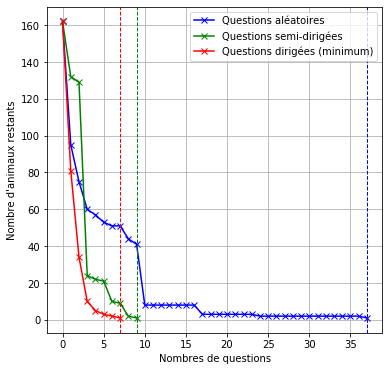

In [57]:
plt.figure(figsize = (6, 6))
for i in range(len(select_courbe.value)) :
    if len(np.where(select_courbe.value[i] == 'Aléatoire')[0]) != 0 :                              # Si on a sélectionner "Questions aléatoires"
        plt.plot(shape_alea, 'x-b', label = 'Questions aléatoires')
        plt.axvline(np.arange(len(shape_alea))[-1], ls = '--', c = 'blue', lw = 1)
    if len(np.where(select_courbe.value[i] == 'Semi-Dirigées')[0]) != 0 :                          # Si on a sélectionner "Questions semi-dirigées"
        plt.plot(shape_semi_dirige, 'x-g', label = 'Questions semi-dirigées')
        plt.axvline(np.arange(len(shape_semi_dirige))[-1], ls = '--', c = 'green', lw = 1)
    if len(np.where(select_courbe.value[i] == 'Dirigées')[0]) != 0 :                               # Si on a sélectionner "Questions dirigées"
        plt.plot(shape_dirige, 'x-r', label = 'Questions dirigées (minimum)')
        plt.axvline(np.arange(len(shape_dirige))[-1], ls = '--', c = 'red', lw = 1)

plt.xlabel('Nombres de questions')
plt.ylabel("Nombre d'animaux restants")
plt.grid(True)
plt.legend()
plt.show()

On voit donc que l'algorithme de questions dirigées converge beaucoup plus vite que l'algorithme de questions aléatoires et un peu plus vite que l'algorithme de questions semi-dirigées. On s'attendait à ce résultat car l'algorithme de questions dirigées permet de choisir les questions en fonction de nos données. En effet, dans le cas des autres méthodes, une part aléatoire joue très souvent en notre défaveur.

Grossièrement, l'algorithme de questions aléatoires possèdes deux "phases":
+ Une phase très piquée, ou l'on converge très vite vers un animal ou un groupe d'animaux.
+ Une phase de plateau, ou l'algorithme pose des questions qui, soit ne font pas avancer le jeu soit n'apportent pas d'information pertinentes quant à l'évolution de celui-ci.

Nous pouvons nous poser quelques questions :
+ L'algorithme pose des questions aléatoires : mais pourquoi donc a-t-on une phase très décroissante ?
+ Pourquoi cette forme si intriguante ? Il serait quand même plus logique d'avoir une forme très irrégulière qui indiquerait le caractère aléatoire..

La réponse se trouve dans nos données : Les questions ne sont pas toutes indépendantes, en effet par exemple une question typique serait : "votre animal est-il un mammifère ?" ou bien  "Votre animal possède-t-il des poumons ?", or si ce sont bien deux questions distinctes, elle ont un lien fort : un mammifère possède des poumons. Mais un reptile aussi... C'est pourquoi l'algorithme utilise indirectement la dépendance des questions (car ceux-ci sont en plus grande proportion), ce qui mène à la phase piquée. Une fois qu'il ne reste plus que des questions très spécifiques ("votre animal est-il comestible dans la coutume européenne ?"), on atteint cette phase de plateau.

Par ailleurs, on remarque cependant que l'algorithme de questions aléatoires, dans sa phase décroissante piquée, est plus efficace que celui des questions semi-dirigées.

## Influence du nombre de données

Un autre aspect intéressant à étudier est l'influence du nombre de données initiales sur le résultat final. En effet, intuitivement, si nous avons un jeu de données très limité, il est clair que la convergence va être très rapide. Au contraire, si le jeu possède une base de donnée très grande, la convergence va être très lente, et il va falloir poser plus de questions.

Visualisons-le : Nous allons tracer la convergence de notre algorithme pour une taille de liste initiale d'animaux différentes. Nous ferons ceci pour l'algorithme le plus efficace que l'on a, à savoir la méthode des questions dirigées.

Prenons une liste initiale de $n_1 = 25$, $n_2 = 50$, $n_3 = 100$ et $n_4 = 162$ animaux et regardons la convergence.

In [58]:
df = pd.read_csv('data_new.csv', delimiter = ';', encoding = "latin1")
data = pd.DataFrame(df)
data = data.to_numpy()
data_copy = data.copy()
print("Taille des données : {}".format(data.shape))
categorie = ["Mammifère", "Oiseaux", "Reptile", "Poisson", "Amphibien", "Insecte", "Invertébré"]

Taille des données : (162, 50)


De la même manière que précédement, on va choisir la classe d'un animal.

In [59]:
menu1 = widgets.Dropdown(
       options = categorie,
       value = categorie[0],
       description = ' Catégorie :')

menu1

Dropdown(description=' Catégorie :', options=('Mammifère', 'Oiseaux', 'Reptile', 'Poisson', 'Amphibien', 'Inse…

In [60]:
ind = np.where(data_copy[:, choix_menu(menu1.value)] == 1)[0]
animaux = data_copy[ind, 0]

Puis un animal appartenant à cette classe :

In [61]:
menu2 = widgets.Dropdown(
       options = animaux,
       value = animaux[0],
       description = ' Animaux :')

menu2

Dropdown(description=' Animaux :', options=('Zèbre', 'Agneau', 'Souris', 'Rat', 'Singe', 'Koala', 'Orque', 'Ch…

In [62]:
ind_animal = np.where(menu2.value == data_copy[:, 0])[0]                            # On récupère l'indice de l'animal choisit
nb_data = np.array([25, 50, 100, data_copy.shape[0]]) - 1
data_ani = [data[ind_animal[0]]]                                                    # On récupère les réponses pour cet animal
print("Voici les données de votre animal : {}".format(data_ani[0]))
data_ss_ani = np.delete(data_copy, ind_animal[0], 0)                                # On supprime la ligne concernant notre animal pour le futur tirage aléatoire

Voici les données de votre animal : ['Tigre' 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]


On peut maintenant définir une fonction qui fera un tirage aléatoire parmis la liste de données.

In [64]:
def selection(X, nb_choix) :
    N = X.shape[0]
    random_choice = random.sample(range(data_ss_ani.shape[0]), nb_choix)
    new_data = data_ss_ani[random_choice]
    return new_data

On peut maintenant visualiser les résultats de la convergence pour chaque liste de taille différentes.

Convergence après 4 itérations.

Voici le résultat : ['Tigre']
Convergence après 6 itérations.

Voici le résultat : ['Tigre']
Convergence après 6 itérations.

Voici le résultat : ['Tigre']
Convergence après 7 itérations.

Voici le résultat : ['Tigre']


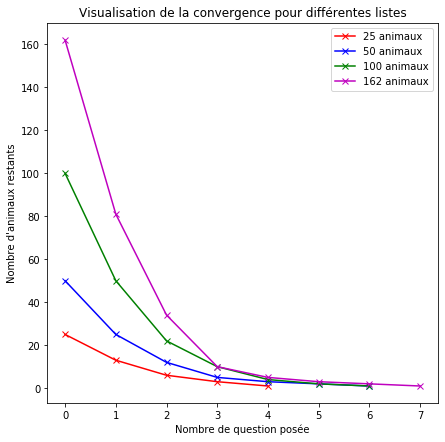

In [76]:
plt.figure(figsize = (7, 7))
a = []
color = ['x-r', 'x-b', 'x-g', 'x-m']
for i, j in enumerate(nb_data) :
    X = selection(data_ss_ani, nb_data[i])                                                     # On effectue un tirage aleatoire de donnée
    X = np.concatenate((X, data_ani), axis = 0)                                                # On ajoute l'animal que l'on a choisit au début
    
    H = Akinator(data)
    data_final, X_shape, rep_ind = H.akinator_dirige_auto(X, ind_animal[0])                    # On applique l'algorithme principal                      
    a.append(X_shape)                                                                          # On sauvegarde le nombre d'animaux à la fin de l'algorithme pour la suite 
    plt.plot(X_shape, color[i], label = "{} animaux".format(j + 1))

plt.xlabel("Nombre de question posée")
plt.ylabel("Nombre d'animaux restants")
plt.title("Visualisation de la convergence pour différentes listes")
plt.legend()
plt.show()

Nous allons analyser cette figure mais il nous faut manipuler un peu ces données afin de les rendres plus lisibles

## Le paramètre $\Xi$

La courbe précédente nous permet de voir que le nombre d'animaux restants dans notre liste après chaque question. Elle décroit exponentiellement avec le nombre de questions posées. Afin d'avoir une idée claire de cette courbe nous nous proposons ici de la modéliser et de faire une régression linéaire. Pour cela nous prenons le logarithme des valeurs de la liste de notre nombre d'animaux afin de nous réduire à un fit linéaire, puis nous appliquons la régréssion linéaire grâce à la méthode des moindres carrés.

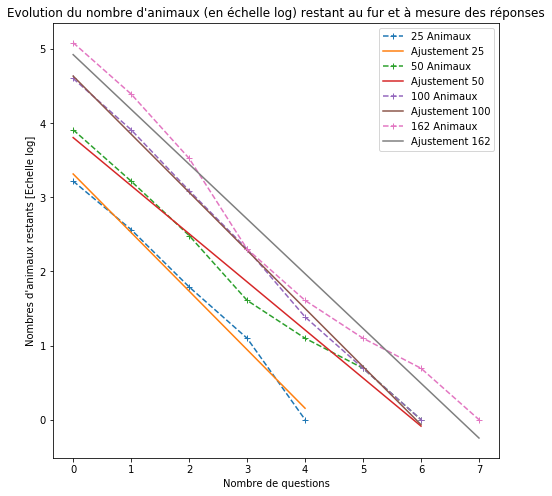

In [80]:
def lin(x,m,b): # Modèle de fit linéaire
    return m*x + b


plt.figure(figsize = (8,8))
label = ["25 Animaux", "50 Animaux", "100 Animaux", "162 Animaux"]
label_ajust = ["Ajustement 25", "Ajustement 50", "Ajustement 100", "Ajustement 162"]

for i in range(len(a)):
    #récupération manuelle des data
    data = np.array(a[i])

    #log des donnée pour un fit linéaire plus clair
    log_data = np.log(data)

    #abscisses:
    x = np.arange(len(data))

    #fits linéaires par des polynômes de degrés 1 avec la méthode des moindres carrés :
    fit = np.polyfit(x, log_data,1)
    #Affichage des plots linéaires
    plt.plot(x, log_data,'+--',label = label[i])
    #Affichage des ajustements
    plt.plot(x, lin(x, fit[0], fit[1]),label = label_ajust[i])

plt.title("Evolution du nombre d'animaux (en échelle log) restant au fur et à mesure des réponses")    
plt.ylabel("Nombres d'animaux restants [Echelle log]")
plt.xlabel("Nombre de questions")
plt.legend()
plt.show()

On remarque ici que d'une part plus le nombre d'animaux dans la liste initiale est élevé et plus l'algorithme va devoir poser de question pour trouver l'animal auquel le joueur pense. En effet ceci s'explique naturellement par le fait que les animaux ont beaucoup de caractéristiques communes, il va donc falloir poser plus de questions pour les différencier.

La non-linéarité en fin de tracé viens du fait que le tracé exponentiel plus haut deviens assez linéaire en fin de course car l'algorithme a convergé, ainsi le passage au logarithme cause cette non-linéarité.
Dans le cas du tigre : pour ~25 animaux dans notre liste initiale, l'algorithme converge au bout de 4-5 étapes, pour ~50 animaux l'algorithme converge en ~6 questions, puis pour une liste plus grande de 100-200 animaux, le graphique nous montre que la convergence -quand elle est assurée- s'effectue en + 7-8 étapes(questions). On verifie donc ce qui est cité précédemment : Plus notre base de données est grande plus il va falloir poser de questions. Notons que ce n'est pas le seul paramètre : le nombre d'animaux peut être énorme mais les animaux peuvent aussi avoir beaucoup de caratéristiques différentes, auquel cas l'algorithme pourrait converger de façon correcte.

On peut se demander quel est le paramètre important à minimiser ici pour décrire l'efficacité ; soit N le nombre d'animaux dans notre liste initiale, soit n le nombre de questions posées par l'algorithme. Le tracé de N en fonction de n nous donne la figure précédente en décroissance exponentielle. En première approche on peut on penser que c'est n le nombre de question qu'il faudrait minimiser et dans les faits c'est exact, le but est de deviner l'animal auquel le joueur pense avec un minimum de questions, néanmoins ce nombre de reflète pas l'efficacité de l'algorithme à deviner l'animal le plus rapidement possible car le nombre de question est corrélé au nombre d'animaux qu'il y a dans notre liste initiale. Un paramètre pertinent serait le nombre de questions relatif :

$$ \Xi = \frac{n}{N}$$

En effet d'une part ce nombre rends compte du fait qu'il faut minimiser le nombre de questions mais prends en compte le nombre d'animaux dans nos données initiales. D'autres part N > n en général, on a ici une mesure de l'efficacité "absolue" de notre algorithme.

In [81]:
def Xi(n, N) :
    return n/N

In [82]:
Xi_alea = Xi(len(shape_alea), len(questions))
Xi_dirige = Xi(len(shape_dirige), len(questions))
Xi_semi_dirige = Xi(len(shape_semi_dirige), len(questions))

print("Questions aléatoires : Xi = {}".format(np.round(Xi_alea, 3)))
print("Questions dirigées : Xi = {}".format(np.round(Xi_dirige, 3)))
print("Questions semi-dirigées : Xi = {}".format(np.round(Xi_semi_dirige, 3)))

Questions aléatoires : Xi = 0.776
Questions dirigées : Xi = 0.163
Questions semi-dirigées : Xi = 0.204


On voit donc bien que l'algorithme le plus efficace est celui qui a le terme $\Xi$ le plus petit, il s'agit bien de celui de questions dirigées.

# Autres méthodes

Précédemment, nous avons conçu et vu plusieurs méthodes pour séparer nos animaux et en reconnaître un seul parmis une vaste liste. Nous allons à présent nous intéresser à deux autres méthodes capables du même résultat.

## Arbre de décision

Un arbre de décision est une aide à la décision sous forme d'un arbre, il permet d'arriver à un résultat grâce à des questions dont les réponses sont sous forme binaire. Dans, cette partie, nous allons essayer de construire l'arbre de décision qui nous permettra de remonter jusqu'à l'animal que l'on souhaite retrouver. On commence par définir une variable qui contiendra les caractéristiques physiques pour chaque animal et une autre variable qui elle contiendra le nom des différents animaux.

In [83]:
from sklearn.tree import DecisionTreeClassifier

X = data_copy[:, 1:]
y = data_copy[:, 0]

On peut maintenant créer notre arbre en spécifiant qu'il ne s'arrête que lorsque tout a été classé. On entrainera celui-ci sur nos données X et y qui sont respectivement les tableaux de caractéristiques ainsi que les noms des animaux. Ici, on entraîne l'arbre qu'on nomme "clf" qui sera un arbre de décision entraîné sur toute les étapes (questions) possibles. Pour qu'on puisse un peu mieux visualiser cet arbre, nous zoomerons sur ses premières étapes.

In [87]:
clf = tree.DecisionTreeClassifier(max_depth = None)                        # Si max_depth = None, affiche toutes les étapes
clf = clf.fit(X, y)                                                        # Entraîne l'arbre

Au préalable, nous avons écrit les noms des caractéristiques afin que l'arbre soit plus lisible, nous pourrons donc voir quelle caractéristique a été observé à chaque noeud. 

In [88]:
caracteristiques = ["Fourrure épaisse", "Troupeau ou groupe", "Charognard", "Queue rayée", "Griffes", "Désert", "Sang humain", "Nocturne", "Long cou", "Défenses", "Cornes", "Creux de la main", "Petit d'un animal", "Ville", "Comestible en Europe", "Vit proche de l'eau", "Forêt", "Jungle", "Canidé", "Félin", "Savane africaine", "Poid", "Poil", "Plume", "Oeuf", "Lait", "Vole", "Aquatique", 
                    "Prédateur", "Dent", "Colonne vertébrale", "Poumon", "Venimeux", "Nageoire", "Queue", "Domestique", "0 patte", "2 pattes", "4 pattes", "5 pattes", "6 patte",
                    "8 pattes", "Mammifère", "Oiseaux", "Reptile", "Poisson", "Amphibien", "Insecte", "Invertébré"]

Ici, on affiche les deux arbres qui représentent la séparation des animaux en fonction des questions posées.

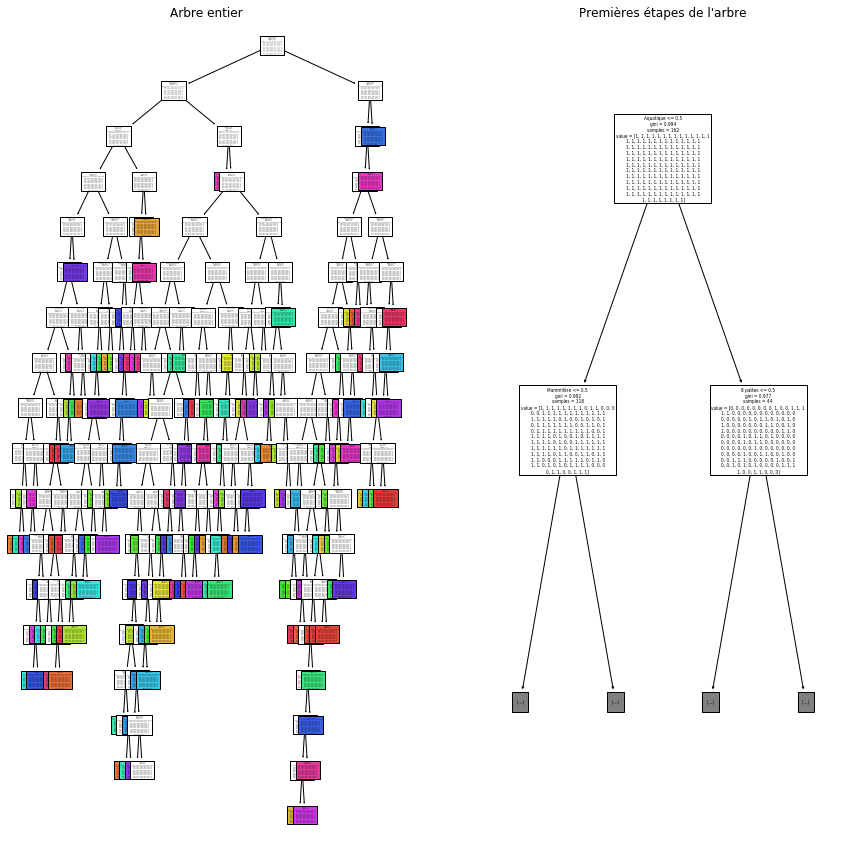

In [89]:
plt.figure(figsize = (15, 15))
plt.subplot(121)
tree.plot_tree(clf, feature_names = caracteristiques, filled = True)
plt.title("Arbre entier")
plt.subplot(122)
tree.plot_tree(clf, feature_names = caracteristiques, filled = True, max_depth = 1)
plt.title("Premières étapes de l'arbre")
plt.show()

Ci-dessus, on peut voir notre arbre de décision en entier à gauche, celui-ci est très grand et peu lisible, on affiche donc la première étape sur la droite. On voit que l'on part de notre liste de départ tout en haut, puis au fur et à mesure que l'on descend, la liste se rétrécit jusqu'à converger vers des animaux seuls. Ceux-ci sont représentés en couleur sur l'arbre. On voit donc que pour certains animaux, cet arbre permet de converger très rapidement (environ 4-5 étapes). Cependant, on voit aussi que l'arbre de décision a du mal à séparer d'autres animaux. Nous verrons plus tard lesquels et nous expliquerons pourquoi.

On va à présent afficher quelques caractéristiques de cet arbre, pour commencer, on affichera le nombre de classe (ici d'animaux) et le nombre de features (ici les caractéristiques de chaque animal).

In [90]:
print("Nombre d'animaux : {}".format(clf.n_classes_))
print("Nombre de carcatéristiques physiques : {}".format(clf.n_features_))

Nombre d'animaux : 162
Nombre de carcatéristiques physiques : 49


On retrouve le nombre de caractéristiques physiques, qui n'est rien d'autre que le nombre de questions que l'on a afin de différencier les animaux.

On peut maintenant afficher le nombre maximum d'étape de l'arbre ainsi que son score. Ici, le score représente la proportion d'animaux qui ont été identifiés et ceci de manière unique.

In [92]:
max_depth = clf.get_depth()
score_arbre = clf.score(X, y)
print()
print("L'arbre a au maximum {} étapes.".format(max_depth))
print("Score : {}".format(np.round(score_arbre, 3)))


L'arbre a au maximum 17 étapes.
Score : 0.981


On voit ici que notre arbre arrive à distinguer environ $98 \%$ des animaux, ce qui signifie qu'il arrive plutôt bien à séparer nos animaux, seul $2 %$ d'entre eux ne sont pas identifiés de manière unique. Dans la cellule du dessous, on va voir une commande qui nous permet de voir l'importance de chaque caractéristique physique. On voit que certaines sont assez utiles pour séparer les différents animaux, et au contraire, certaines ne le sont pas du tout. Ceci pose des questions sur la pertinence de nos questions.

In [93]:
print()
print("get_n_leaves : {}".format(clf.get_n_leaves()))
importance = clf.feature_importances_

ind_max_n_leaves = np.where(importance == np.max(importance))[0]                          # Indice où l'importance est maximum
ind_0_n_leaves = np.where(importance == 0)[0]                                             # Indice où l'importance est nulle
questions_non_utiles = []

for i in ind_0_n_leaves :
    questions_non_utiles.append(questions[i])

print()
print("Question la plus utile : {}".format(questions[ind_max_n_leaves[0]]))
print()
print("Questions les moins utiles : {}".format(questions_non_utiles))
print()


get_n_leaves : 159

Question la plus utile : Votre animal vit-il en troupeau ou en groupe ?

Questions les moins utiles : ['Votre animal possède-t-il une queue rayée ?', 'Votre animal a-t-il des plumes ? ', 'Votre animal est-il un poisson ? ', 'Votre animal est-il un amphibien ? ', 'Votre animal est-il un insecte ? ']



On voit ici que la question qui demande si notre animal vit en groupe est celle qui sépare le plus nos données. Au contraire, les questions du dessous, sont celles qui séparent le moins les données. Ceci encore une fois provient de plusieurs choses :

+ D'une part notre jeu de donnée : en effet il regroupe beaucoup de mammifères et assez peu les autres classes. Bon nombre de mammifères vivent en groupe, c'est pourquoi cette question permets une bonne séparation du jeu de donnée.
+ De la remarque précédente en découle une autre : en effet si la question "Votre animal chasse-t-il sa nourriture" est utilisée, alors la question "Votre animal est-il un mammifère ?" n'est plus tellement pertinente.

Par ailleurs, nous nous rendons compte qu'identifier la classe d'un animal en premier lieu n'est pas forcément plus pertinent : les questions les moins utiles nous indiquent donc que d'autres questions sont plus à même de séparer les données.

Dans le code ci-dessous, nous allons essayer de voir quels animaux "posent problème". En effet, on a vu que certains animaux n'étaient pas séparés les uns des autres. Dans le module sklearn, il existe une commande permettant de retrouver la feuille de l'arbre pour chaques animaux. La feuille d'un arbre de décision est l'emplacement où est stocké l'animal en question, plus il y a de feuilles, et plus nos animaux seront séparés les uns des autres. 

In [94]:
leaf_animaux = clf.apply(X, check_input = True)                     # Nous donne les feuilles de l'arbre de chaques animaux

La définition ci-dessous nous permet de nous afficher tous les animaux qui sont stockés dans la même feuille, qui ne sont donc pas clairement identifiés de manière unique. En effet, elle va boucler sur toutes nos feuilles et dès que l'une d'entre elle contient au moins 2 animaux, elle l'affiche.

In [95]:
def doublon(X) :
    tab = np.arange(min(X), max(X) + 1)
    res = []
    for i in tab :
        ind = np.where(X == i)[0]
        if len(ind) == 1 or len(ind) == 0 :
            pass
        else :    
            print(data_copy[ind, 0])
    return None

In [96]:
doublon(leaf_animaux)

['Faucon' 'buse' 'Aigle']
['Putois' 'Blaireau']


Après avoir appelé notre fonction, on voit qu'il nous reste deux feuilles où nos animaux ne sont pas clairement identifiés. Dans l'une d'entre elle, il nous reste le faucon, la buse et l'aigle. En effet, ces trois oiseaux se ressemblent énormément, autant au niveau physique qu'au niveau du comportement, il paraît donc logique qu'avec "seulement" nos données, l'arbre ne puisse pas faire la différence entre ces ceux-ci. Nous avons le même argument pour le putois et le blaireau, deux animaux qui se ressemble énormément ont plus de chances de se retrouver dans la même feuille de l'arbre.

### Test de l'arbre

Dans la partie précédente, nous avons vu ce que faisait notre arbre de décision et comment il fonctionnait. Maintenant, nous allons essayer d'entrainer notre arbre afin qu'il puisse faire des prédictions. En effet, le but du jeu Akinator est de deviner les animaux auxquels vous pensez, sauf qu'ici, pour deviner un animal, il va falloir donner toutes les caractéristiques de celui-ci, ce qui dans un sens n'est plus de la prédiction mais de la recherche dans une base de donnée. On va donc essayer de prédire la classe d'un animal, c'est-à-dire que l'on va entraîner l'arbre sur un certain nombre d'entrées, puis on essayera de préduire s'il s'agit d'un mammifère, d'un reptile, etc... Pour se faire, on commence déjà par importer un module qui nous permettra de séparer nos données d'entrainements de nos données de tests.

In [97]:
from sklearn.model_selection import train_test_split

Dans la cellule du dessous, nous allons effectuer une boucle qui nous permettra de faire des prédictions sur toutes les classes. Pour chaque tour, nous allons définir notre tableau de données $X$ comme l'ensemble des réponses aux différentes caractéristiques et notre tableau $y$ comme un tableau unidimensionnel pour les classes. On entrainera notre arbre de décision grâce aux données d'entrainements puis nous ferons des prédictions qui seront stockées dans un tableau $y_{pred}$. Enfin, on pourra calculer le score de chaques arbres pour chaque classe. Ensuite, on pourra faire un moyennage des scores obtenus afin d'obtenir 7 différents scores pour chacunes des classes de nos données et ainsi voir si elles sont plutôt bien retrouvées par l'algorithme.

In [98]:
col_classe = np.arange(43, len(data_copy[0]))
nb_tirage = 1000
y_pred = []
score = np.zeros((nb_tirage, 7))

for k in range(nb_tirage) :
    for i, j in enumerate(col_classe) :
        X = data_copy[:, 1:42]
        y = data_copy[:, j]

        X = X.astype('int')
        y = y.astype('int')

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
    
        clf3 = tree.DecisionTreeClassifier(max_depth = None)
        clf3 = clf3.fit(X_train, y_train)
        y_pred.append(clf3.predict(X_test))
        score[k, i] = clf3.score(X_test, y_test)

In [99]:
mean = np.zeros(7)
for i in range(7) :
    mean[i] = score.mean(axis = 0)[i]

Nous créons une définition qui affichera le score de chaque arbre en pourcentage de bonne réponse.

In [100]:
def affichage(X) :
    for i in range(len(X)) :
        print("Score des prédictions pour la classe {} : {} %".format(categorie[i], np.round(X[i]*100, 1)))
def affichage_moy(X) :
    for i in range(len(X)) :
        print("Score des prédictions pour la classe {} sur {} tirages : {} %".format(categorie[i], nb_tirage, np.round(X[i]*100, 2)))

In [101]:
affichage(score[0])
print()
affichage_moy(mean)

Score des prédictions pour la classe Mammifère : 100.0 %
Score des prédictions pour la classe Oiseaux : 100.0 %
Score des prédictions pour la classe Reptile : 95.4 %
Score des prédictions pour la classe Poisson : 100.0 %
Score des prédictions pour la classe Amphibien : 100.0 %
Score des prédictions pour la classe Insecte : 98.5 %
Score des prédictions pour la classe Invertébré : 98.5 %

Score des prédictions pour la classe Mammifère sur 1000 tirages : 97.41 %
Score des prédictions pour la classe Oiseaux sur 1000 tirages : 99.91 %
Score des prédictions pour la classe Reptile sur 1000 tirages : 93.66 %
Score des prédictions pour la classe Poisson sur 1000 tirages : 99.4 %
Score des prédictions pour la classe Amphibien sur 1000 tirages : 98.05 %
Score des prédictions pour la classe Insecte sur 1000 tirages : 97.35 %
Score des prédictions pour la classe Invertébré sur 1000 tirages : 96.92 %


Au final, la première définition nous montre que pour chacune des classes, le score est plutôt très bon. L'algorithme arrive très bien à attribuer une classe à une donnée qu'on lui donne. Cependant, quand on observe les résultats sur le moyennage, on voit que les prédictions faites sur les reptiles donnent en moyenne un moins bon résultat (mais qui reste quand même très bien). En effet, ceci vient du fait que nous avons assez peu de reptile dans nos données comparés aux mammifères et que leurs caractéristiques sont proches de celles d'un mammifère. Pour améliorer ce score, on pourrait par exemple d'une part ajouter plus de reptiles dans nos données, ou d'autre part ajouter d'autres caractéristiques afin que l'arbre de décision puisse mieux séparer nos animaux.

## Random Forest

Après avoir vu ce que pouvait faire un seul arbre de décision sur nos données, on remarque donc que celui-ci permet de bien classer nos animaux et permet même de faire quelques prédictions sur certaines classes. Maintenant, on va pouvoir améliorer un peu le modèle en utilisant l'algorithme du Random Forest, celui-ci est basé sur l'entrainement d'une multitude d'arbres aléatoires (d'où le terme random forest). Grâce à cette méthode, nous allons essayer de faire converger notre algorithme un peu plus vite qu'avec un simple arbre de décision. En effet, dans cette partie, nous allons essayer de mieux comprendre ce que fait l'algorithme sur nos données, puis nous allons voir ce qui pourrait être bénéfique dans notre sujet.

On commence par importer les modules permettant d'utiliser cette méthode.

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
X = data_copy[:, 1:]
y = data_copy[:, 0]

De la même manière que pour l'arbre de décision, nous allons ici créer notre "Random Forest" en appelant la classe et en spécifiant le nombre d'arbre que l'on veut. Pour commencer, nous prendrons $n_{estimators} = 1$.

In [104]:
randomforest = RandomForestClassifier(n_estimators = 1)

On va ensuite toujours de la même manière entraîner nos données.

In [105]:
randomforest = randomforest.fit(X, y)

Une fois notre méthode créée, on pourra afficher son score pour voir si elle marche plutôt bien ou non.

In [106]:
score = randomforest.score(X, y)
print("Pour n_estimators = 1, on a un score de : {}".format(np.round(score, 3)))

Pour n_estimators = 1, on a un score de : 0.623


On voit que ce score n'est pas aussi bien que celui de l'arbre de décision simple, on peut donc essayer d'augmenter le nombre d'arbre que nous avons dans notre forêt. On va maintenant effectuer la même chose, mais en bouclant sur un certains nombre d'arbre.

In [107]:
index = np.arange(1, 20 + 1)
score = []
for i in index :
    randomforest = RandomForestClassifier(n_estimators=i)
    randomforest.fit(X, y)
    score.append(randomforest.score(X, y))

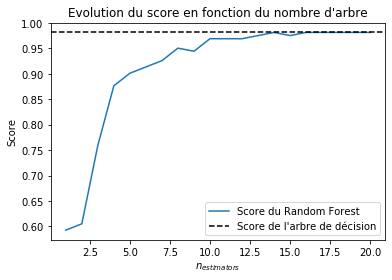

In [108]:
plt.figure()
plt.title("Evolution du score en fonction du nombre d'arbre")
plt.plot(index, score, label = "Score du Random Forest")
plt.axhline(score_arbre, ls = '--', c = 'black', label = "Score de l'arbre de décision")
plt.xlabel(r"$n_{estimators}$")
plt.ylabel("Score")
plt.legend()
plt.show()

Nous pouvons voir ci-dessus le résultat de ce petit calcul, on voit que plus on rajoute d'arbre dans notre algorithme de Random Forest, plus le score évolue mais cependant, ce score ne dépassera jamais le score que nous avons calculé lors de la partie sur l'arbre de décision simple. En effet, aucun algorithme ne pourra départager les animaux qui se trouvent dans les mêmes feuilles, car il nous faut plus de caractéristiques pour départager ces animaux.
Finalement, on voit qu'un arbre de décision simple ainsi que l'algorithme du Random Forest (pour $n_{estimators}$ assez grand) obtiennent des scores équivalents. Le différence entre ces deux types d'algorithmes est que l'arbre de décision va mettre un certains nombre d'étape avant de converger vers notre animal alors que si on passe par un Random Forest, celui-ci mettra beaucoup moins d'itération pour converger vers notre animal. Le Random Forest constitue donc une optimisation d'un arbre de décision.

Par ailleurs, comme vous l'avez pu remarquer, nous entraînons les arbres de décisions à reconnaître des classes et non pas des animaux directement. En effet la diversité des caractéristiques des animaux nous limite dans l'entraînement de l'arbre.

#### Analyse du "chemin suivis"

Créons maintenant un algorithme de Random Forest pour $n_{estimators} = 50$. Après l'avoir entrainé sur nos données (on choisira le tigre ici), nous allons lui demander de nous renvoyer le chemin qu'il a suivi pour chaque arbre de décision qu'il a créé grâce à la commande "decision_path". Cette commande nous renvoie deux éléments, le premier étant une matrice sparse remplie de $0$ et de $1$. Ces nombres nous indique pour chaque arbre, si l'animal que nous avons choisi est "passé" par ce chemin, le $1$ représentant un 'oui' et le $0$ un 'non'. On rappelle qu'une matrice sparse est un objet contenant les valeurs non-nulle d'une matrice, ainsi que leurs indices. La matrice étant trop grande pour être stockée, il est plus simple de retirer tous les $0$ qui sont inutiles. Le deuxième élement renvoyé par la commande "decision_path" est une liste d'indice qui nous indique où commencent et où finissent les différents arbres composant la forêt.

In [109]:
ind_animal = 24
randomforest_50 = RandomForestClassifier(n_estimators = 50)
randomforest_50 = randomforest.fit(X, y)

(node_indicator, n_node_ptr) = randomforest_50.decision_path(X)

On importe ce module qui permet de transformer une matrice sparse en matrice bidimensionnelle.

In [110]:
from scipy.sparse import coo_matrix

On commence par choisir la ligne correspondant à notre animal, ici le tigre est représenté par la ligne 24.

In [111]:
node_1 = coo_matrix(node_indicator).toarray()[ind_animal]

On écrit ici une fonction qui va nous séparer les différents arbres puis compter le nombre de $1$ dans chacuns d'eux. Ceci va nous permettre de compter finalement le nombre d'étapes qu'il faut pour converger vers notre animal. Le but de cette partie est de montrer que notre algorithme va converger plus vite qu'un simple arbre de décision, on va donc, pour tous les arbres de notre Random Forest calculer les nombres d'étapes, puis afficher le minimum.

In [113]:
def separe(X, ind) :
    X_f = []
    nb_1 = []
    k = 1
    while k < len(ind) :
        liste = np.arange(ind[k-1], ind[k])
        nb_1.append(len(np.where(X[liste] == 1)[0]))
        X_f.append(X[liste])
        k += 1
    return X_f, nb_1

X_f, nb_1 = separe(node_1, n_node_ptr)

print()
print("il faut au minimum {} étapes pour prédire : {}".format(min(nb_1), data_copy[ind_animal, 0]))
print()


il faut au minimum 4 étapes pour prédire : Tigre



Maintenant, on peut étudier la variation de ce minimum si on change le $n_{estimators}$ du début. Pour ce faire, on va répéter l'opération précédente pour des $n_{estimators}$ différents, et pour chacunes de ces différentes valeurs, on va prendre la moyenne de chaque minimum sur 50 valeurs. Cette opération va nous donner :

In [114]:
def plot_min(X, y, ind_animal, n) :
    n_esti = []
    min_step = []
    mean = []
    for i in range(1, n) :
        tab_mean = []
        for k in range(50) :
            randomforest = RandomForestClassifier(n_estimators = i)
            randomforest.fit(X, y)
            (node_indicator, n_node_ptr) = randomforest.decision_path(X)
            node_1 = coo_matrix(node_indicator).toarray()[ind_animal]
            X_f, nb_1 = separe(node_1, n_node_ptr)
            tab_mean.append(min(nb_1))
        n_esti.append(i)
        min_step.append(min(nb_1))
        mean.append(np.mean(tab_mean))
    plt.figure(figsize = (8, 8))
    plt.title("Evolution du nombre d'étape en fonction du nombre d'arbre de décision pour {}".format(data_copy[ind_animal, 0]))
    plt.plot(n_esti, mean, 'o-r')
    plt.xlabel(r"$n_{estimators}$")
    plt.ylabel("Nombre d'étapes")
    plt.show()

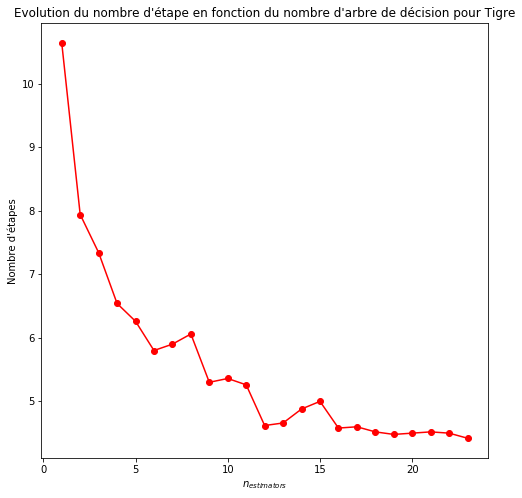

In [115]:
plot_min(X, y, ind_animal, 24)

On voit sur le graphique ci-dessus que plus on augmente le nombre d'arbres dans notre Random Forest, plus l'algorithme va trouver rapidement notre animal. Cela est normal puisque l'algorithme va lancer plusieurs arbres en même temps, et certains d'entre eux auront des enchaînements de questions quasiment parfait pour converger au plus vite vers notre animal. Plus $n_{estimators}$ est grand, et plus de chance on a de converger vite. En remarque, on pourra dire que si on augmente encore la valeur de $n_{estimators}$, le nombre d'étapes minimum va atteindre un plateau, en effet, il sera compliqué pour l'algorithme de converger plus vite que 2-3 questions, à moins d'avoir peu d'animaux ou bien d'avoir des caractéristiques pertinentes à la séparation.

# Approche Probabiliste : Inférence Bayésienne

Jusqu'à maintenant, nous avons vu une approche déterministe du problème. En effet, nous avions construit plusieurs algorithmes qui retiraient des animaux à chaque fois que l'on répondait oui ou non (1 ou 0). On avait aussi introduit une réponse "Ne sait pas" au cas où l'utilisateur ne sache pas répondre, afin qu'il ne soit pas bloqué par une question, seulement, l'utilisation de cette réponse ne modifie pas la probabilité de chaque animal. C'est pourquoi on aimerait construire le même type d'algorithme mais basé sur une approche probabiliste en utilisant l'inférence bayésienne. La mise en place de ce type d'algorithme est assez délicate, de par le fait que la bibliographie n'est pas très clair dessus, à l'exception de quelques articles [[2](#Bibliographie)] qui amènent des approches intéressantes mais finalement n'améliorent pas l'algorithme. Néanmoins certains sites utilisent l'approche bayésienne pour faire un jeu type akinator, et l'expliquent très bien, utilisant un dictionnaire python. C'est donc en s'inspirant du travail de Rogério Chaves [[3](#Bibliographie)] que nous présentons le travail ci-dessous.

Dans la méthode précédente, l'utilisation de la réponse "Ne sait pas" ne nous donne pas plus de chance de trouver un animal qu'un autre. Ici, le but de cette nouvelle méthode est de prendre en compte ces réponses afin qu'elle change les probabilités de chaque animal et que l'on converge donc plus vite vers l'un d'entre eux. Pour cela, nous avons remplacé la commande "Ne sait pas" par les commandes "probablement" et "probablement pas", ce qui nous permet de trouver la bonne réponse même si l'utilisateur venait à se tromper. Ceci est un aspect non négligeable de l'algorithme. On va donc voir que les nouvelles commandes introduites vont permettent de donner plus de poids dans le calcul de probabilité et ceci permettra de faire des propositions au fur et à mesure du calcul.

Dans le cas probabiliste, chaque étape nous apporte de l'information, cette information peut être mise à profil afin d'être utilisée pour trouver plus rapidement l'animal auquel le joueur pense. C'est donc naturellement qu'apparaît le théorème de bayes dans notre cas :

$$P\left( A | B \right) = \frac{P\left( B | A \right) P\left( A \right)}{P\left( B \right)}$$

Explicitons tout ces termes :
+ A représente l'animal auquel on pense. 
+ B est la réponse de notre joueur

Nous avons quatres termes différents :

   + $P \left( A | B \right)$ est la probabilité que l'on cherche : La probabilité que le joueur pense à l'animal A sachant qu'il a donné la réponse B.
   + $P\left( A \right)$ : La probabilité de trouver l'animal choisi par le joueur, il vaut donc $\frac{1}{\text{Nombre d'animaux restant}}$ car les animaux ont autant de chances d'être choisis par le joueur. Autrement dit, c'est le prior.
   + $P\left( B \right)$ : Le posterior qui est ici la probabilité que le joueur donne la réponse B, il vaut donc $\frac{1}{4}$ car nous avons 4 réponses, qui ont autant de chances d'être données chacunes.
   + $P \left( B | A \right)$ : La probabilité que le joueur réponde la réponse B sachant l'animal A. Autrement dit, la likelihood.
   
Cette likelihood est ici le paramètre déterminant, en effet, elle permettra de modifier le poids des animaux en fonction de la réponse choisie. Par exemple, lorsque la réponse est "oui" ou "non", notre définition de la likelihood renverra un tableau contenant des 1 et des 0, ces chiffres permettant de conserver ou supprimer les animaux. Lorsque la réponse sera "probablement" ou "probablement pas", ce tableau se composera de 1 et de 0.5 (ce chiffre a été choisi car c'est la valeur moyenne des deux réponses) et permettra de conserver la probabilité de certains animaux ou de réduire celle d'autres. Ensuite, nous appliquerons une définition qui normalisera l'ensemble du tableau afin qu'on ait :

$$\sum\limits_{i = 0}^{N} p_i = 1 \hspace{2cm} \text{avec } p_i \text{ la probabilité de chacun des animaux}$$

In [116]:
df = pd.read_csv('data_new.csv', delimiter = ';', encoding = "latin1")
data = pd.DataFrame(df)
data = data.to_numpy()
data_copy = data.copy()
animaux = data[:, 0]

Nous allons définir une première fonction qui pourra nous calculer le prior de nos données à une itération donnée. On supposera un prior uniforme sur toutes nos données.

In [117]:
def prior(animaux) :
    return 1/len(animaux)

Maintenant, nous allons définir une fonction de likelihood qui nous retournera un tableau de coefficient permettant d'ajuster nos probabilitées en fonction de la réponse donnée et de la question posée.

In [118]:
tab = np.zeros(len(data_copy))

def likelihood(X, reponse, ind) :
    for i in range(len(data_copy[:, 0])) :
        if data_copy[i, ind] == reponse :
            X[i] = 1
        elif data_copy[i, ind] != reponse and reponse != 3 and reponse != 4 :
            X[i] = 0
        elif reponse == 3 :          # Probablement
            if data_copy[i, ind] == 0 :
                X[i] = 0.5
            else :
                X[i] = 1
        else :
            if data_copy[i, ind] == 1 :
                X[i] = 0.5
            else :
                X[i] = 1
    return X

Enfin, il ne reste plus qu'à définir l'évidence (ou le posterior) qui est simplement la probabilité de chaque réponse. Nous avons ici 4 réponses possibles, donc un posterior de $\frac{1}{4}$.

In [119]:
def evidence(possib_rep) :
    return 1/len(possib_rep)

On pourra donc calculer la probabilité totale pour chaque animal de la liste. Cette probabilité est donnée par la formule de Bayes définie plus tôt.

In [120]:
def proba(animaux, reponses, ind, possib_rep) : # Proba bayésienne
    #Prior : 
    prior_f = prior(animaux) #Les animaux ont tous le même prior

    #Likelihood:
    likelihood_f = likelihood(tab, reponses, ind)

    # Evidence :
    evidence_f = evidence(possib_rep)
    
    return (likelihood_f * prior_f) / evidence_f

Enfin, on définit une fonction qui renormalise le tableau de probabilités afin que la somme de toutes les probabilitées fasse 1.

In [121]:
def normalisation(X, rep) :
    ind_nul = np.where(X == 0)[0]
    if rep == 1 :                        # Oui
        ind_nn = np.where(X != 0)[0]
        nb_nn = len(ind_nn)
        proba_normalise = 1/nb_nn
        X[ind_nn] = proba_normalise
    elif rep == 0 :                      # Non
        ind_nn = np.where(X != 0)[0]
        nb_nn = len(ind_nn)
        proba_normalise = 1/nb_nn
        X[ind_nn] = proba_normalise
    elif rep == 3 :                      # Probablement
        X = X / np.sum(X)
    else :                               # Probablement pas
        X = X / np.sum(X)
    return X

On peut donc effectuer notre boucle principale, on prendra comme base l'algorithme de questions dirigées vu plus tôt. Nous aurons juste à introduire les appels de nos fonctions au sein de la boucle afin que les probabilitées de chaque animal se mettent à jour.

In [122]:
def Akinator_dirige_bayes(X) :
    tab_proba = [np.ones(len(X)) * prior(X)]
    A = np.arange(len(questions))
    data_shape = np.zeros(len(questions))
    data_shape = [X.shape[0]]
    data_tab = [X]
    indice = []
    indice_dont_know = []
    rep_ind = np.zeros((2, len(questions)))
    inf = True
    i = 0
    i_dont_know = 0
    while inf == True :
        if i < len(A) and len(X[:, 0]) != 1 :
            print()
            tab = count(X)                                                       # Compte le nombre de 1 et 0 pour chaque caractéristique physique
            diff_tab = abs(tab[0] - tab[1])                                      # Fait la différence des deux
            diff_tab[indice_dont_know] = np.nan
            ind_question = np.where(diff_tab == min(diff_tab))[0]                # Recherche de la question la plus optimale à poser
            indice.append(ind_question[0])                                       # Sauvegarde de l'indice de la question
                
            rep = ask_question_dirige(indice[-1])
            
            rep_ind[0, i] = rep
            rep_ind[1, i] = indice[-1]
            
            if rep == 3 or rep == 4 :                                                         # Si on ne sait pas la réponse, sauvegarde l'indice de la question
                indice_dont_know.append(indice[-1])
                pass

            else :
                
                ### Traitement du tableau en fonction de la réponse donnée

                X, inf = choix_rep(X, rep, [indice[-1]], inf)
                
                
                
                
            #print(indice)
            tab_proba.append(normalisation(proba(X[:, 0], rep, indice[-1]+1, [0, 1, 3, 4]), rep) * tab_proba[i])
            tab_proba[-1] = tab_proba[i+1] / np.sum(tab_proba[i+1])
            
            seuil = 0.6                                        
            ind_seuil = np.where(tab_proba[-1] > seuil)[0]
            if len(ind_seuil) != 0 :
                propose = int(input("Pensiez vous à {}".format(data_copy[ind_seuil, 0])))
                if propose == 1:
                    break
                else :
                    None
            
            
            print(tab_proba[-1])
            data_shape.append(X.shape[0])                                         # Sauvegarde le nombre d'animaux restant à chaques tours
            print("Vos données ont une dimension de {}".format(X.shape))
            data_tab.append(X)                                                    # Sauvegarde le tableau de données modifiées à chaques tours


            ### Conditions d'arrêts de l'algorithme

            inf = condition_arret_bis(X, i, inf, data_shape)                   # Condition d'arrêt de la boucle

            i += 1
        else :
            rep_ind = np.delete(rep_ind, np.arange(i, len(questions)), 1)
            print("Convergence après {} itérations.".format(i))                   # Affiche le nombre d'itération pour atteindre la convergence
            print()
            print("Voici le résultat : {}".format(X[:, 0]))                       # Affiche les solutions
            inf = False
    return X, data_shape, rep_ind, tab_proba

In [123]:
X, Y, Z, proba = Akinator_dirige_bayes(data_copy)

Votre animal pond-t-il des oeufs ?  0


[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
 0.         0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
 0.01234568 0.01234568 0.01234568 0.         0.01234568 0.
 0.01234568 0.         0.         0.         0.         0.01234568
 0.01234568 0.01234568 0.01234568 0.         0.01234568 0.01234568
 0.         0.01234568 0.01234568 0.01234568 0.01234568 0.
 0.01234568 0.01234568 0.         0.         0.         0.
 0.         0.01234568 0.01234568 0.         0.         0.01234568
 0.         0.         0.         0.01234568 0.01234568 0.
 0.01234568 0.         0.01234568 0.01234568 0.         0.
 0.         0.         0.01234568 0.01234568 0.         0.01234568
 0.01234568 0.01234568 0.         0.         0.         0.
 0.         0.         0.         0.         0.01234568 0.
 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
 0.01234568 0.01234568 0.         0.01234568 0.01234568 0.
 0.         0.         0.         0.         0.         0.


Votre animal chasse-t-il sa nourriture ?  1


[0.         0.         0.         0.         0.         0.
 0.         0.02941176 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02941176 0.         0.         0.         0.02941176 0.
 0.         0.02941176 0.02941176 0.         0.         0.
 0.         0.02941176 0.         0.         0.         0.
 0.         0.         0.02941176 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02941176 0.02941176 0.         0.02941176
 0.02941176 0.02941176 0.         0.         0.         0.
 0.         0.         0.         0.         0.02941176 0.
 0.02941176 0.         0.02941176 0.02941176 0.02941176 0.02941176
 0.         0.02941176 0.         0.02941176 0.02941176 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0294

Votre animal pèse-t-il au moins deux hommes ? 3


[0.         0.         0.         0.         0.         0.
 0.         0.04545455 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.04545455 0.         0.         0.         0.02272727 0.
 0.         0.04545455 0.04545455 0.         0.         0.
 0.         0.02272727 0.         0.         0.         0.
 0.         0.         0.04545455 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02272727 0.04545455 0.         0.02272727
 0.02272727 0.02272727 0.         0.         0.         0.
 0.         0.         0.         0.         0.02272727 0.
 0.02272727 0.         0.02272727 0.02272727 0.02272727 0.02272727
 0.         0.02272727 0.         0.04545455 0.04545455 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0227

Votre animal vit-il à proximité d’une source aquatique ? 0


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.06896552 0.         0.         0.         0.03448276 0.
 0.         0.06896552 0.06896552 0.         0.         0.
 0.         0.03448276 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.03448276 0.06896552 0.         0.03448276
 0.         0.03448276 0.         0.         0.         0.
 0.         0.         0.         0.         0.03448276 0.
 0.03448276 0.         0.         0.03448276 0.03448276 0.03448276
 0.         0.03448276 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0344

Votre animal est-il un félin ? 1


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.18181818 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.09090909 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.09090909 0.18181818 0.         0.09090909
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.09090909 0.09090909 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

Votre animal provient-il de la savane africaine ? 4


[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.25   0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.0625 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.0625 0.125  0.     0.0625 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.125  0.125  0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.125  0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.0625 0.     0.   

Votre animal possède-t-il de longues griffes acérées ? 1


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.33333333 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.08333333 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.16666667 0.         0.08333333
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.16666667 0.16666667 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

Votre animal peut-il vivre dans la jungle ? 1
Pensiez vous à ['Tigre'] 1


On pourra remarquer que grâce à toutes nos probabilités, nous avons rajouté une condition d'arrêt, non plus sur le nombre de données restantes, mais sur la plus grande probabilité du tableau. En effet, on définit une probabilité seuil $p_{seuil}$ telle que si $p > p_{seuil}$ alors on propose à l'interlocuteur l'animal en question. En effet, il y aura beaucoup de chance que ce soit cet animal que l'interlocuteur aura choisi. Plusieurs avantages donc à opter pour l'approche probabiliste :
   
   + D'une part selon les réponses, on peut converger plus rapidement que l'approche déterministe car dans le cas ou il ne reste que peu d'animaux, on peux proposer celui qui a la probabilité la plus grande.
   + D'autre part le choix de réponse plus élaboré dans notre cas qui fait en sorte que même si le joueur se trompe sur les options "probablement" et "probablement pas", il reste quand même une chance de trouver l'animal en question.
   
Quand on regarde en détail notre approche probabiliste réside au coeur des réponses "probablement" et "probablement pas". En effet, en dehors de ces réponses on retombe sur l'approche déterministe, et donc sur l'algorithme des questions dirigées vu précedemment.

# Méthodes de visualisation / Classifications

## PCA

Une façon de visualiser les données que l'on a est de faire une analyse de composantes principales (PCA) sur celles-ci. Ici on réduit notre dimension des questions (ici 49) à un espace ou l'on peux visualiser nos données (on prendra 3). Cette opération parait risquée car réduire 49 dimension à 3 nous fait perdre potentiellement beaucoup d'informations. Néanmoins il sera peut être possible que les animaux qui ont les mêmes caractéristiques soient regroupés dans un certaine portion de l'espace.

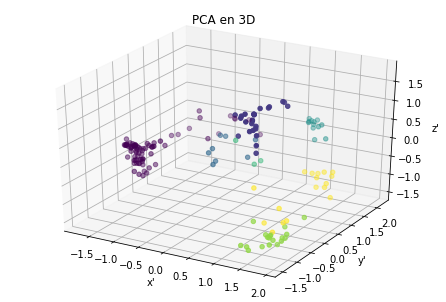

In [157]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

%matplotlib inline

data_class = data_copy[:, 43:]                                                 # On récupère les dernière colonnes des datas qui contiennent les classes d'animaux :
ind_1 = np.where(data_class == 1)[1]                                           # Mammifères, Insectes, Reptiles, Oiseaux, Invertébrés, Poissons et Amphibiens.
ind_1 = ind_1 + 1
class_animal = ind_1                                                           # Class_animal regroupes les animaux qui appartient aux classes mammifères, oiseaux....

pca = decomposition.PCA(n_components = 3)                                      # Créer la PCA
data_t = pca.fit_transform(data_copy[:, 1:])                                   # L'applique aux données

fig = plt.figure()
ax = Axes3D(fig)

plt.title("PCA en 3D")
ax.scatter(data_t[:,0], data_t[:,1], data_t[:,2], c = class_animal)
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.set_zlabel("z'")
plt.show()

On voit sur la figure ci-dessus que chaque couleur représente une classe différentes (mammifères, reptiles, etc...), On observe que certaines classes sont assez bien séparées des autres.

## Kmeans

On pourra maintenant s'imaginer que nous avons nos données, mais que nous ne connaissons pas les classes de chacuns des animaux, nous allons essayer de voir si, appliquer un algorithme de K-Means s'avère efficace afin de retrouver ces différentes classes.

Tout d'abord, rappelons ce qu'est un algorithme de K-Means. Ce dernier permet de retrouver des regroupements de données, il calcule les centres de chaque clusters en calculant la distance entre chaque points de données des centres déjà placés (aléatoirement au début). On a vu en TP que cette technique fonctionne plutôt bien pour des clusters bien séparés les uns des autres. Dans notre cas, on voit que cet algorithme fonctionnera plutôt bien pour certaines classes mais pas pour d'autres. En effet, on voit que certaines de nos données sont à cheval entre deux clusters, ceci viens du fait que certains animaux d'une classe possèdent des caractéristiques d'autres classes (chauves-souris, ornithorynque..). On pourra quand même essayer de prédire ces clusters et regarder l'efficacité de cette méthode.

On commence par afficher nos données sans leurs classes. On ne peut donc plus distinguer les animaux d'une classe ou d'une autre.

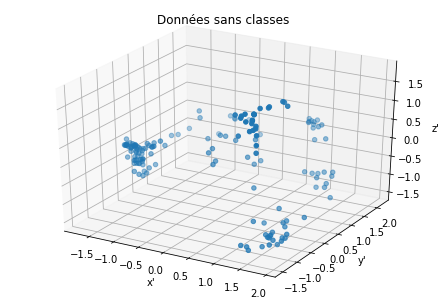

In [158]:
fig = plt.figure()
ax = Axes3D(fig)
plt.title("Données sans classes")
ax.scatter(data_t[:,0], data_t[:,1], data_t[:,2])                   # Plot des datas sans les couleurs
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.set_zlabel("z'")
plt.show()

On commence par importer le module de sklearn permettant de faire un K-Means.

In [159]:
from sklearn.cluster import KMeans

On appelle la fonction K-means, on doit lui donner le nombre de classe que l'on a, ici 7. Ensuite, on doit préciser un random state = 2 afin que le résultat soit meilleur.

In [160]:
kmeans = KMeans(n_clusters = 7, random_state = 2).fit(data_t)                                 # Application du kmeans

On peut donc afficher les résultats après avoir récupéré les coordonnées des centres de chaques clusters.

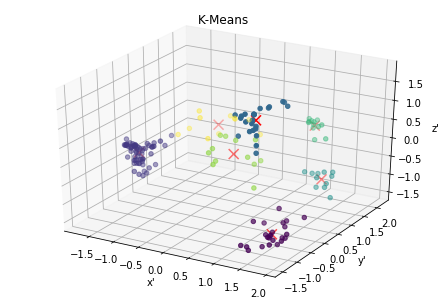

In [161]:
centers = kmeans.cluster_centers_   # Récupérations des centres

fig = plt.figure()
ax = Axes3D(fig)
plt.title("K-Means")
ax.scatter(data_t[:,0], data_t[:,1], data_t[:,2], c = kmeans.labels_)                           # Plot des datas avec les labels attribués par le K-Means
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c = "red", marker = "x", s = 100)          # Plot des centres
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.set_zlabel("z'")
plt.show()

In [162]:
rep = class_animal == kmeans.labels_                                                     # Vérification de la bonne association des animaux à la bonne classe
 
ind_true = np.where(rep == True)[0]                                                      # Indice des True

pourcent = len(ind_true) * 100 / len(rep)                                                # Pourcentage de True par rapport au nombre de donnée

print("Voici le pourcentage de bon résultats : {} %".format(np.round(pourcent, 2)))

Voici le pourcentage de bon résultats : 66.05 %


En comparant le résultat aux données réelles dont on dispose, on peut calculer le pourcentage de bonne estimation, qui ici est de $66 \%$. On voit que ce résultat est moyen, ce qui colle avec notre hypothèse de départ qui est que notre clusters sont trop rapprochés, ce qui montre que certains de nos animaux sont à cheval entre deux classes.

# Ouverture

Nous avons donc fini d'analyser nos données, nous allons pourvoir maintenant parler de concepts et de méthodes que nous aurions voulu mettre en place si nous avions eu plus de temps. En effet, nous aurions pu parler de la visualisation de la classification de notre Random Forest et arbre de décision. Nous aurions voulu écrire une fonction permettant de montrer les "frontières" entre nos différentes classes comme on le verra ci-dessous. En effet, le temps nous ayant manqué, nous avons pris et adapté une définition prise sur un site internet qui explique assez bien la méthode [[4]](#Bibliographie). Cette définition nous permet de montrer les frontières de nos données pour différents algorithmes, ici un RandomForest et un arbre de décision simple. Tout d'abord, il nous faut refaire une réduction de dimension pour passer de notre espace initial à un espace de 2 dimensions. On obtient donc :

In [153]:
from sklearn.tree import DecisionTreeClassifier

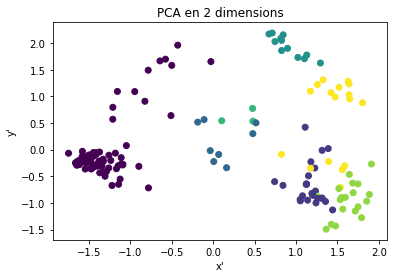

In [163]:
data_class = data_copy[:, 43:]                               # On récupère les dernière colonnes des datas qui contiennent les classes d'animaux :
ind_1 = np.where(data_class == 1)[1]                         # Mammifères, Insectes, Reptiles, Oiseaux, Invertébrés, Poissons et Amphibiens.
ind_1 = ind_1 + 1
class_animal = ind_1                                         # class_animal regroupes les animaux qui appartient aux classes mammifères, oiseaux....

pca = decomposition.PCA(n_components = 2)                    # Réduction à 2 dimensions
data_t = pca.fit_transform(data_copy[:, 1:]) 

plt.figure(1)
plt.scatter(data_t[:,0], data_t[:,1], c = class_animal)
plt.title("PCA en 2 dimensions")
plt.xlabel("x'")
plt.ylabel("y'")
plt.show()

Ici, on recrée un arbre de décision qui a été entrainé sur nos données.

In [138]:
X = data_t
y = class_animal
tree = DecisionTreeClassifier().fit(X, y)

Enfin, voici la définition dont on parle ci-dessus, elle prend en entrée le modèle que l'on choisit de visualiser, ainsi que nos données X et y. Cette définition fonctionne sur le principe de prédiction du modèle choisi. Ainsi, grâce aux deux tableaux d'indices "xx" et "yy", leurs prédictions va créer des frontières sur notre graphique.

In [164]:
def visualize_classifier(model, X, y, ax=None):
    fig = plt.figure()
    ax = ax or plt.gca()
    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=500),
                         np.linspace(*ylim, num=500))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

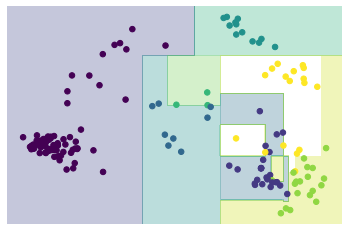

In [165]:
visualize_classifier(DecisionTreeClassifier(), X, y)

Ci-dessus, on voit la carte des frontières obtenus, on voit que celles-ci sont composées de lignes droite. En effet, notre modèle est un arbre de décision simple, dont avec un choix de réponse binaire (Vrai ou faux). Ce type de réponse nous donne donc des frontières de type "binaire", donc en ligne droite. En revanche, si l'on refait la même opération pour un Random Forest qui lui est composé de 50 arbres de décisions, on va voir que ces frontières vont changer, elles seront plus précise.

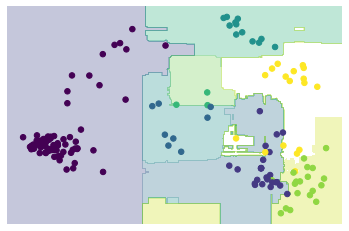

In [166]:
X = data_t
y = class_animal
model = RandomForestClassifier(n_estimators = 50)
visualize_classifier(model, X, y)

# Retour sur le mini projet

## <font color ='green'> Inconvénients <font>

Le premier inconvénient de notre sujet a été de compléter manuellement notre tableau de données, en effet, il n'existait pas de tableau déjà défini comme on le souhaitait. Nous avons donc du créer notre propre base de donnée ce qui a été quelque chose de fastidieux à faire et qui nous a donc pris du temps sur la phase de réflexion et d'analyse des données. 

Le second inconvénient de notre sujet a été d'établir nos différentes méthodes de convergence. En effet, il a été assez compliqué de créer un code assez clair pour la compréhension d'autres personnes, nous avons essayé d'écrire le code le plus clair et concis possible tout en y ajoutant quelques options d'optimisations tels que le retour en arrière ou  encore la réponse "Ne sait pas" qui permet de débloquer l'interlocuteur.

Enfin, le dernier inconvénient a été dans l'analyse des données, en effet, nous avions très peu de piste au début, l'approche probabiliste a été dure à mettre en place, les articles en rapport avec l'approche bayésienne sur akinator étant très théoriques. La bibliographie sur ce sujet n'était pas très précise et se répétant souvent pour différentes sources.

## <font color ='green'>Avantages : Résumé des choses apprises <font>

Grâce à ce sujet, nous avons pu appliquer tout un panel de méthode vu pendant cet UE. Ainsi, certaines de ces méthodes n'étant pas très claires à première vue, nous avons donc pu les appliquer dans un cas concret, ce qui facilite grandement la compréhension. De plus, ce mini projet nous a permis de nous améliorer dans l'usage du language Python et de ces méthodes. Finalement, ceci nous a permis d'entreprendre une réflexion approfondie dans le travail par projet, sur un sujet intéressant et simple en première approche, mais qui relève d'une complexité de par la manipulation des données et l'analyse de celles-ci, les méthodes choisies et finalement l'optimisation de ces dernières.

# Bibliographie

##### Akinator-Wikipédia [1](https://fr.wikipedia.org/wiki/Akinator_:_Le_G%C3%A9nie_du_web)
##### Akinator Bayésien [2](https://medium.com/analytics-vidhya/building-akinator-with-python-using-bayes-theorem-216253c98daa) 
##### Stratégies Bayésiennes [3](https://dukespace.lib.duke.edu/dspace/bitstream/handle/10161/16414/Suresh_duke_0066N_14270.pdf?sequence=1)
##### Decision Tree - Random Forest [4](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)
##### Dataset - Kaggle [5](https://www.kaggle.com/uciml/zoo-animal-classification)